<a href="https://colab.research.google.com/github/jodekpotasu/smoghub/blob/master/Projekt_ko%C5%84cowy_analiza_smogu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt końcowy - analiza smogu

## Wstęp

**Smog** – zjawisko atmosferyczne powstałe w wyniku wymieszania się mgły z dymem i spalinami. Zanieczyszczenie powietrza, jakim jest smog, powstaje wskutek przedostawania się do atmosfery szkodliwych związków chemicznych, takich jak tlenki siarki i tlenek azotu oraz substancje stałe, czyli pyły zawieszone, a także kancerogenne wielopierścieniowe węglowodory aromatyczne (WWA). Wchodzące w skład smogu związki chemiczne, pyły i znaczna wilgotność stanowią zagrożenie dla zdrowia człowieka. Są czynnikami alergizującymi i mogą wywołać astmę oraz jej napady, a także powodować zaostrzenie przewlekłego zapalenia oskrzeli, niewydolność oddechową lub paraliż układu krwionośnego. Smog powoduje także zmniejszenie masy urodzeniowej noworodka, zwiększa zapadalność na nowotwory oraz przewlekłą obturacyjną chorobę płuc (POChP), jak i zwiększa prawdopodobieństwo wystąpienia astmy u dzieci. 

W wyniku badań stwierdzono, że 15% wszystkich epizodów objawów astmy można przypisać zanieczyszczeniu powietrza. Związek następuje także w przypadku chorób niedokrwiennych serca u osób starszych. Badania przeprowadzano w miejscach w pobliżu ruchliwych dróg ze znacznym natężeniem ruchu. Zamieszkanie w miejscach z natężeniem ruchu powyżej 10 tys. pojazdów dziennie uznano za wyznacznik długotrwałej ekspozycji na zanieczyszczenia związane z ruchem drogowym.

Zgodnie z wynikami badań ESCAPE w przypadku drobnych zanieczyszczeń (do średnicy 2,5 mikrometra – PM2,5) każdy wzrost gęstości pyłu o 5 µg/m3 na metr sześcienny powoduje wzrost ryzyka śmierci z przyczyn naturalnych aż o 7%. 



**VOC voice of customer** - Biorąc pod uwagę te dane dotyczące ryzyka związanego z ekspozycją na smog i potrzeby klientów, projektujemy aplikację. Użytkownik chciałby mieć możliwość zaplanowania wyjścia z domu (zakupy, uprawianie sportu), tak żeby uniknąć podtruwania smogiem, chciałby mieć możliwość sprawdzenia, czy wyjście z domu w tej chwili jest dobrym pomysłem. Użytkownik chciałby wiedzieć, czy wyjście z dzieckiem czy osobą niepełnosprawną jest w tej chwili możliwe lub, czy może je zaplanować na najbliższy czas.

 **CTQ (critical-to-quality outputs) - Krystalizacja problemu** - 
biorąc pod uwagę dane atmosferyczne (wilgotność, temperaturę, ciśnienie) oraz czas i miejsce chcemy przewidzieć, czy smog jest wysoce prawdopodobny i lepiej zostać w domu czy można wyjść. Interesuje nas również podział na osoby zdrowe i chore/dzieci, gdyż dla nich granice przedziałów powinny być bardziej wyśrubowanie.

**Propozycja rozwiązania problemu**
Biorąc pod uwagę naturę problemu, będziemy korzystać z klasyfikacji - wysokie ryzyko smogu - brak smogu. Będziemy skupiać się na recallu, gdyż lepiej ocenić sytuację zbyt surowo niż jeśli osoba chora ma wyjść w czasie smogu.

Wypróbujemy klasyczne proste metody klasyfikacji (rezygnując z regresji logistycznej - dane często dwumodalne) oraz później deep learning.

Dalszą drogą rozwoju byłoby podpięcie aplikacji pod dane pomiarowe w czasie rzeczywistym, możliwość pobierania danych z API pogodowego typu ICM, predykcja na 48h do przodu oraz pobieranie lokalizacji, podłączanie standardowych tras przejść, uprawiania sportu, oraz propozycję "czystych tras" w okolicy, do uprawiania sportu i do wykonania prostych czynności (sklep, poczta, paczkomat, kawiarnie). 

In [246]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup
import requests
import re
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import xlwt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## Import danych

In [247]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/april-2017.csv -P "/content/drive/My Drive/app"

--2021-04-16 18:45:43--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/april-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 710963 (694K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/april-2017.csv.3’

april-2017.csv.3    100%[===================>] 694.30K  --.-KB/s    in 0.03s   

2021-04-16 18:45:43 (22.6 MB/s) - ‘/content/drive/My Drive/app/april-2017.csv.3’ saved [710963/710963]



In [248]:
april = pd.read_csv("/content/drive/My Drive/app/april-2017.csv")
# april.head()

In [249]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/sensor_locations.csv -P "/content/drive/My Drive/app"

--2021-04-16 18:45:43--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/sensor_locations.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1362 (1.3K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/sensor_locations.csv.3’

sensor_locations.cs 100%[===================>]   1.33K  --.-KB/s    in 0s      

2021-04-16 18:45:43 (60.5 MB/s) - ‘/content/drive/My Drive/app/sensor_locations.csv.3’ saved [1362/1362]



In [250]:
sensor = pd.read_csv("/content/drive/My Drive/app/sensor_locations.csv")
# sensor.head(-1)

In [251]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/august-2017.csv -P "/content/drive/My Drive/app"

--2021-04-16 18:45:43--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/august-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 696059 (680K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/august-2017.csv.3’

august-2017.csv.3   100%[===================>] 679.75K  --.-KB/s    in 0.03s   

2021-04-16 18:45:44 (24.0 MB/s) - ‘/content/drive/My Drive/app/august-2017.csv.3’ saved [696059/696059]



In [252]:
august = pd.read_csv("/content/drive/My Drive/app/august-2017.csv")
# august.head()

In [253]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/december-2017.csv -P "/content/drive/My Drive/app"
december = pd.read_csv("/content/drive/My Drive/app/december-2017.csv")
# december.head()

--2021-04-16 18:45:44--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/december-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 590472 (577K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/december-2017.csv.3’

december-2017.csv.3 100%[===================>] 576.63K  --.-KB/s    in 0.03s   

2021-04-16 18:45:44 (18.4 MB/s) - ‘/content/drive/My Drive/app/december-2017.csv.3’ saved [590472/590472]



In [254]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/february-2017.csv -P "/content/drive/My Drive/app"
february = pd.read_csv("/content/drive/My Drive/app/february-2017.csv")
# february.head()

--2021-04-16 18:45:44--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/february-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 680312 (664K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/february-2017.csv.3’

february-2017.csv.3 100%[===================>] 664.37K  --.-KB/s    in 0.03s   

2021-04-16 18:45:44 (21.8 MB/s) - ‘/content/drive/My Drive/app/february-2017.csv.3’ saved [680312/680312]



In [255]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/january-2017.csv -P "/content/drive/My Drive/app"
january = pd.read_csv("/content/drive/My Drive/app/january-2017.csv")
# january.head()

--2021-04-16 18:45:45--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/january-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 787175 (769K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/january-2017.csv.3’

january-2017.csv.3  100%[===================>] 768.73K  --.-KB/s    in 0.07s   

2021-04-16 18:45:45 (10.1 MB/s) - ‘/content/drive/My Drive/app/january-2017.csv.3’ saved [787175/787175]



In [256]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/july-2017.csv -P "/content/drive/My Drive/app"
july = pd.read_csv("/content/drive/My Drive/app/july-2017.csv")
# july.head()

--2021-04-16 18:45:45--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/july-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 712045 (695K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/july-2017.csv.3’

july-2017.csv.3     100%[===================>] 695.36K  --.-KB/s    in 0.03s   

2021-04-16 18:45:45 (20.6 MB/s) - ‘/content/drive/My Drive/app/july-2017.csv.3’ saved [712045/712045]



In [257]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/june-2017.csv -P "/content/drive/My Drive/app"
june = pd.read_csv("/content/drive/My Drive/app/june-2017.csv")
# june.head()

--2021-04-16 18:45:46--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/june-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 710623 (694K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/june-2017.csv.3’

june-2017.csv.3     100%[===================>] 693.97K  --.-KB/s    in 0.04s   

2021-04-16 18:45:46 (18.5 MB/s) - ‘/content/drive/My Drive/app/june-2017.csv.3’ saved [710623/710623]



In [258]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/march-2017.csv -P "/content/drive/My Drive/app"
march = pd.read_csv("/content/drive/My Drive/app/march-2017.csv")
# march.head()

--2021-04-16 18:45:46--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/march-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 744529 (727K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/march-2017.csv.3’

march-2017.csv.3    100%[===================>] 727.08K  --.-KB/s    in 0.04s   

2021-04-16 18:45:46 (20.1 MB/s) - ‘/content/drive/My Drive/app/march-2017.csv.3’ saved [744529/744529]



In [259]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/may-2017.csv -P "/content/drive/My Drive/app"
may = pd.read_csv("/content/drive/My Drive/app/may-2017.csv")
# may.head()

--2021-04-16 18:45:47--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/may-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 752733 (735K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/may-2017.csv.3’

may-2017.csv.3      100%[===================>] 735.09K  --.-KB/s    in 0.03s   

2021-04-16 18:45:47 (22.4 MB/s) - ‘/content/drive/My Drive/app/may-2017.csv.3’ saved [752733/752733]



In [260]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/november-2017.csv -P "/content/drive/My Drive/app"
november = pd.read_csv("/content/drive/My Drive/app/november-2017.csv")
# november.head()

--2021-04-16 18:45:47--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/november-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 745539 (728K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/november-2017.csv.3’

november-2017.csv.3 100%[===================>] 728.07K  --.-KB/s    in 0.04s   

2021-04-16 18:45:47 (20.0 MB/s) - ‘/content/drive/My Drive/app/november-2017.csv.3’ saved [745539/745539]



In [261]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/october-2017.csv -P "/content/drive/My Drive/app"
october = pd.read_csv("/content/drive/My Drive/app/october-2017.csv")
# october.head()

--2021-04-16 18:45:47--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/october-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 727655 (711K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/october-2017.csv.3’

october-2017.csv.3  100%[===================>] 710.60K  --.-KB/s    in 0.06s   

2021-04-16 18:45:48 (11.7 MB/s) - ‘/content/drive/My Drive/app/october-2017.csv.3’ saved [727655/727655]



In [262]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/september-2017.csv -P "/content/drive/My Drive/app"
september = pd.read_csv("/content/drive/My Drive/app/september-2017.csv")
# september.head()

--2021-04-16 18:45:48--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/september-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662609 (647K) [text/plain]
Saving to: ‘/content/drive/My Drive/app/september-2017.csv.3’

september-2017.csv. 100%[===================>] 647.08K  --.-KB/s    in 0.03s   

2021-04-16 18:45:48 (21.8 MB/s) - ‘/content/drive/My Drive/app/september-2017.csv.3’ saved [662609/662609]



In [263]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()



# Analiza danych- data mining

Zbiór ten zawiera dane o jakości powietrza (stężenia pyłu zawieszonego PM1, PM2,5 i PM10, temperatura, ciśnienie i wilgotność powietrza) z 2017 roku generowane przez sieć 56 sensorów zlokalizowanych w Krakowie. Pomiary są pogrupowane w 12 plikach, po jednym dla każdego miesiąca.

*   PM1 nie jest skalibrowany i dlatego może być większy niż PM2,5
*   PM2,5 może być większy niż PM10 w granicach błędu pomiaru
*   Przez pierwsze dwa miesiące wilgotność i temperatura nie były
kalibrowane i dlatego mogą pokazywać niedokładne wartości

Dane są ustrukturyzowane w ten sposób, że nazwy kolumn zaczynają się od numeru sensoru, a później jest nazwa zmiennej (temperarura, wilgotność, PM), w wierszach są zapisywane dane w czasie.

oddzielny plik zawiera dane geolokalizacyjne opisujące punkty pomiarowe -dane potrzebne do oceny stanu w danym miejscu (metoda wieloboków Thiessena)

Dane skumulowane z pierszymi dwoma miesiącami


In [264]:
allM = pd.concat([january, february, march, april, may, june, july, august, september, october, november, december])

In [265]:
allM

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102097.0,107.0,118.0,184.0,-4.0,52.0,102322.0,167.0,188.0,296.0,0.0,48.0,102507.0,102.0,117.0,188.0,1.0,24.0,102192.0,104.0,123.0,197.0,0.0,27.0,102260.0,...,102064.0,137.0,158.0,234.0,0.0,47.0,101483.0,86.0,92.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,65.0,102047.0,112.0,123.0,193.0,-3.0,51.0,102277.0,164.0,184.0,290.0,0.0,49.0,102463.0,96.0,110.0,179.0,1.0,24.0,102144.0,98.0,115.0,186.0,0.0,27.0,102212.0,...,102024.0,148.0,173.0,256.0,0.0,47.0,101441.0,84.0,90.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2017-12-24T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,87.0,101736.0,14.0,14.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,63.0,101704.0,11.0,13.0,21.0,6.0,88.0,101691.0,...,101781.0,10.0,11.0,18.0,6.0,85.0,101766.0,8.0,9.0,15.0,6.0,88.0,101973.0,16.0,17.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,101742.0,22.0,24.0,43.0,6.0,79.0,101726.0,12.0,15.0,31.0,5.0,85.0,101798.0,13.0,15.0,26.0
573,2017-12-24T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,88.0,101776.0,13.0,13.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,63.0,101741.0,10.0,11.0,18.0,6.0,88.0,101726.0,...,101822.0,10.0,11.0,18.0,5.0,85.0,101813.0,7.0,9.

In [266]:
cut = allM.iloc[24:,:]
reversecut=allM.iloc[0:24,:]
reversetable=pd.concat([cut, reversecut])

Dane skumulowane bez pierwszych dwóch miesięcy

In [267]:
kalibM = pd.concat([march, april, may, june, july, august, september, october, november, december])

## wypłaszczanie tabeli

wypłaszczanie tabeli


In [268]:
M0M = allM.iloc[:,0]
M3M = allM.iloc[:,0:7]
M140M = allM.iloc[:,7:13]
M142M = allM.iloc[:,13:19]
M147M = allM.iloc[:,19:25]
M169M = allM.iloc[:,25:31]
M170M = allM.iloc[:,31:37]
M171M = allM.iloc[:,37:43]
M172M = allM.iloc[:,43:49]
M173M = allM.iloc[:,49:55]
M174M = allM.iloc[:,55:61]
M176M = allM.iloc[:,61:67]
M177M = allM.iloc[:,67:73]
M178M = allM.iloc[:,73:79]
M179M = allM.iloc[:,79:85]
M180M = allM.iloc[:,85:91]
M181M = allM.iloc[:,91:97]
M182M = allM.iloc[:,97:103]
M183M = allM.iloc[:,103:109]
M184M = allM.iloc[:,109:115]
M185M = allM.iloc[:,115:121]
M187M = allM.iloc[:,121:127]
M189M = allM.iloc[:,127:133]
M192M = allM.iloc[:,133:139]
M194M = allM.iloc[:,139:145]
M195M = allM.iloc[:,145:151]
M196M = allM.iloc[:,151:157]
M201M = allM.iloc[:,157:163]
M202M = allM.iloc[:,163:169]
M203M = allM.iloc[:, 169:175]
M204M = allM.iloc[:,175:181]
M205M = allM.iloc[:,181:187]
M208M = allM.iloc[:,187:193]
M209M = allM.iloc[:,193:199]
M210M = allM.iloc[:,199:205]
M211M = allM.iloc[:,205:211]
M212M = allM.iloc[:,211:217]
M213M = allM.iloc[:,217:223]
M214M = allM.iloc[:,223:229]
M215M = allM.iloc[:,229:235]
M216M = allM.iloc[:,235:241]
M218M = allM.iloc[:,241:247]
M219M = allM.iloc[:,247:253]
M220M = allM.iloc[:,253:259]
M221M = allM.iloc[:,259:265]
M222M = allM.iloc[:,265:271]
M223M = allM.iloc[:,271:277]
M225M = allM.iloc[:,277:283]
M226M = allM.iloc[:,283:289]
M227M = allM.iloc[:,289:295]
M228M = allM.iloc[:,295:301]
M263M = allM.iloc[:,301:307]
M622M = allM.iloc[:,307:313]
M713M = allM.iloc[:,313:319]
M808M = allM.iloc[:,319:325]
M857M = allM.iloc[:,325:331]
M895M = allM.iloc[:,331:337]

M3M['Name'] = '3'
# M140M = allM.iloc[:,7:13]
M140M['Name'] = '140'
# M142M = allM.iloc[:,13:19]
M142M['Name'] = '142'
# M147M = allM.iloc[:,19:25]
M147M['Name'] = '147'
# M169M = allM.iloc[:,25:31]
M169M['Name'] = '169'
# M170M = allM.iloc[:,31:37]
M170M['Name'] = '170'
# M171M = allM.iloc[:,37:43]
M171M['Name'] = '171'
# M172M = allM.iloc[:,43:49]
M172M['Name'] = '172'
# M173M = allM.iloc[:,49:55]
M173M['Name'] = '173'
# M174M = allM.iloc[:,55:61]
M174M['Name'] = '174'
# M176M = allM.iloc[:,61:67]
M176M['Name'] = '176'
# M177M = allM.iloc[:,67:73]
M177M['Name'] = '177'
# M178M = allM.iloc[:,73:79]
M178M['Name'] = '178'
# M179M = allM.iloc[:,79:85]
M179M['Name'] = '179'
# M180M = allM.iloc[:,85:91]
M180M['Name'] = '180'
# M181M = allM.iloc[:,91:97]
M181M['Name'] = '181'
# M182M = allM.iloc[:,97:103]
M182M['Name'] = '182'
# M183M = allM.iloc[:,103:109]
M183M['Name'] = '183'
# M184M = allM.iloc[:,109:115]
M184M['Name'] = '184'
# M185M = allM.iloc[:,115:121]
M185M['Name'] = '185'
# M187M = allM.iloc[:,121:127]
M187M['Name'] = '187'
# M189M = allM.iloc[:,127:133]
M189M['Name'] = '189'
# M192M = allM.iloc[:,133:139]
M192M['Name'] = '192'
# M194M = allM.iloc[:,139:145]
M194M['Name'] = '194'
# M195M = allM.iloc[:,145:151]
M195M['Name'] = '195'
# M196M = allM.iloc[:,151:157]
M196M['Name'] = '196'
# M201M = allM.iloc[:,157:163]
M201M['Name'] = '201'
# M202M = allM.iloc[:,163:169]
M202M['Name'] = '202'
# M203M = allM.iloc[:, 169:175]
M203M['Name'] = '203'
# M204M = allM.iloc[:,175:181]
M204M['Name'] = '204'
# M205M = allM.iloc[:,181:187]
M205M['Name'] = '205'
# M208M = allM.iloc[:,187:193]
M208M['Name'] = '208'
# M209M = allM.iloc[:,193:199]
M209M['Name'] = '209'
# M210M = allM.iloc[:,199:205]
M210M['Name'] = '210'
# M211M = allM.iloc[:,205:211]
M211M['Name'] = '211'
# M212M = allM.iloc[:,211:217]
M212M['Name'] = '212'
# M213M = allM.iloc[:,217:223]
M213M['Name'] = '213'
# M214M = allM.iloc[:,223:229]
M214M['Name'] = '214'
# M215M = allM.iloc[:,229:235]
M215M['Name'] = '215'
# M216M = allM.iloc[:,235:241]
M216M['Name'] = '216'
# M218M = allM.iloc[:,241:247]
M218M['Name'] = '218'
# M219M = allM.iloc[:,247:253]
M219M['Name'] = '219'
# M220M = allM.iloc[:,253:259]
M220M['Name'] = '220'
# M221M = allM.iloc[:,259:265]
M221M['Name'] = '221'
# M222M = allM.iloc[:,265:271]
M222M['Name'] = '222'
# M223M = allM.iloc[:,271:277]
M223M['Name'] = '223'
# M225M = allM.iloc[:,277:283]
M225M['Name'] = '225'
# M226M = allM.iloc[:,283:289]
M226M['Name'] = '226'
# M227M = allM.iloc[:,289:295]
M227M['Name'] = '227'
# M228M = allM.iloc[:,295:301]
M228M['Name'] = '228'
# M263M = allM.iloc[:,301:307]
M263M['Name'] = '263'
# M622M = allM.iloc[:,307:313]
M622M['Name'] = '622'
# M713M = allM.iloc[:,313:319]
M713M['Name'] = '713'
# M808M = allM.iloc[:,319:325]
M808M['Name'] = '808'
# M857M = allM.iloc[:,325:331]
M857M['Name'] = '857'
# M895M = allM.iloc[:,331:337]
M895M['Name'] = '895'


In [269]:
M3M.columns.values[1] = "temperature"
M3M.columns.values[2] = "humidity"
M3M.columns.values[3] = "pressure"
M3M.columns.values[4] = "pm1"
M3M.columns.values[5] = "pm25"
M3M.columns.values[6] = "pm10"
M140M = pd.concat([M0M, M140M], axis=1)
M140M.columns.values[1] = "temperature"
M140M.columns.values[2] = "humidity"
M140M.columns.values[3] = "pressure"
M140M.columns.values[4] = "pm1"
M140M.columns.values[5] = "pm25"
M140M.columns.values[6] = "pm10"
M142M = pd.concat([M0M, M142M], axis=1)
M142M.columns.values[1] = "temperature"
M142M.columns.values[2] = "humidity"
M142M.columns.values[3] = "pressure"
M142M.columns.values[4] = "pm1"
M142M.columns.values[5] = "pm25"
M142M.columns.values[6] = "pm10"
M147M = pd.concat([M0M, M147M], axis=1)
M147M.columns.values[1] = "temperature"
M147M.columns.values[2] = "humidity"
M147M.columns.values[3] = "pressure"
M147M.columns.values[4] = "pm1"
M147M.columns.values[5] = "pm25"
M147M.columns.values[6] = "pm10"
M169M = pd.concat([M0M, M169M], axis=1)
M169M.columns.values[1] = "temperature"
M169M.columns.values[2] = "humidity"
M169M.columns.values[3] = "pressure"
M169M.columns.values[4] = "pm1"
M169M.columns.values[5] = "pm25"
M169M.columns.values[6] = "pm10"
M170M = pd.concat([M0M, M170M], axis=1)
M170M.columns.values[1] = "temperature"
M170M.columns.values[2] = "humidity"
M170M.columns.values[3] = "pressure"
M170M.columns.values[4] = "pm1"
M170M.columns.values[5] = "pm25"
M170M.columns.values[6] = "pm10"
M171M = pd.concat([M0M, M171M], axis=1)
M171M.columns.values[1] = "temperature"
M171M.columns.values[2] = "humidity"
M171M.columns.values[3] = "pressure"
M171M.columns.values[4] = "pm1"
M171M.columns.values[5] = "pm25"
M171M.columns.values[6] = "pm10"
M172M = pd.concat([M0M, M172M], axis=1)
M172M.columns.values[1] = "temperature"
M172M.columns.values[2] = "humidity"
M172M.columns.values[3] = "pressure"
M172M.columns.values[4] = "pm1"
M172M.columns.values[5] = "pm25"
M172M.columns.values[6] = "pm10"
M173M = pd.concat([M0M, M173M], axis=1)
M173M.columns.values[1] = "temperature"
M173M.columns.values[2] = "humidity"
M173M.columns.values[3] = "pressure"
M173M.columns.values[4] = "pm1"
M173M.columns.values[5] = "pm25"
M173M.columns.values[6] = "pm10"
M174M = pd.concat([M0M, M174M], axis=1)
M174M.columns.values[1] = "temperature"
M174M.columns.values[2] = "humidity"
M174M.columns.values[3] = "pressure"
M174M.columns.values[4] = "pm1"
M174M.columns.values[5] = "pm25"
M174M.columns.values[6] = "pm10"
M176M = pd.concat([M0M, M176M], axis=1)
M176M.columns.values[1] = "temperature"
M176M.columns.values[2] = "humidity"
M176M.columns.values[3] = "pressure"
M176M.columns.values[4] = "pm1"
M176M.columns.values[5] = "pm25"
M176M.columns.values[6] = "pm10"
M177M = pd.concat([M0M, M177M], axis=1)
M177M.columns.values[1] = "temperature"
M177M.columns.values[2] = "humidity"
M177M.columns.values[3] = "pressure"
M177M.columns.values[4] = "pm1"
M177M.columns.values[5] = "pm25"
M177M.columns.values[6] = "pm10"
M178M = pd.concat([M0M, M178M], axis=1)
M178M.columns.values[1] = "temperature"
M178M.columns.values[2] = "humidity"
M178M.columns.values[3] = "pressure"
M178M.columns.values[4] = "pm1"
M178M.columns.values[5] = "pm25"
M178M.columns.values[6] = "pm10"
M179M = pd.concat([M0M, M179M], axis=1)
M179M.columns.values[1] = "temperature"
M179M.columns.values[2] = "humidity"
M179M.columns.values[3] = "pressure"
M179M.columns.values[4] = "pm1"
M179M.columns.values[5] = "pm25"
M179M.columns.values[6] = "pm10"
M180M = pd.concat([M0M, M180M], axis=1)
M180M.columns.values[1] = "temperature"
M180M.columns.values[2] = "humidity"
M180M.columns.values[3] = "pressure"
M180M.columns.values[4] = "pm1"
M180M.columns.values[5] = "pm25"
M180M.columns.values[6] = "pm10"
M181M = pd.concat([M0M, M181M], axis=1)
M181M.columns.values[1] = "temperature"
M181M.columns.values[2] = "humidity"
M181M.columns.values[3] = "pressure"
M181M.columns.values[4] = "pm1"
M181M.columns.values[5] = "pm25"
M181M.columns.values[6] = "pm10"
M182M = pd.concat([M0M, M182M], axis=1)
M182M.columns.values[1] = "temperature"
M182M.columns.values[2] = "humidity"
M182M.columns.values[3] = "pressure"
M182M.columns.values[4] = "pm1"
M182M.columns.values[5] = "pm25"
M182M.columns.values[6] = "pm10"
M183M = pd.concat([M0M, M183M], axis=1)
M183M.columns.values[1] = "temperature"
M183M.columns.values[2] = "humidity"
M183M.columns.values[3] = "pressure"
M183M.columns.values[4] = "pm1"
M183M.columns.values[5] = "pm25"
M183M.columns.values[6] = "pm10"
M184M = pd.concat([M0M, M184M], axis=1)
M184M.columns.values[1] = "temperature"
M184M.columns.values[2] = "humidity"
M184M.columns.values[3] = "pressure"
M184M.columns.values[4] = "pm1"
M184M.columns.values[5] = "pm25"
M184M.columns.values[6] = "pm10"
M185M = pd.concat([M0M, M185M], axis=1)
M185M.columns.values[1] = "temperature"
M185M.columns.values[2] = "humidity"
M185M.columns.values[3] = "pressure"
M185M.columns.values[4] = "pm1"
M185M.columns.values[5] = "pm25"
M185M.columns.values[6] = "pm10"
M187M = pd.concat([M0M, M187M], axis=1)
M187M.columns.values[1] = "temperature"
M187M.columns.values[2] = "humidity"
M187M.columns.values[3] = "pressure"
M187M.columns.values[4] = "pm1"
M187M.columns.values[5] = "pm25"
M187M.columns.values[6] = "pm10"
M189M = pd.concat([M0M, M189M], axis=1)
M189M.columns.values[1] = "temperature"
M189M.columns.values[2] = "humidity"
M189M.columns.values[3] = "pressure"
M189M.columns.values[4] = "pm1"
M189M.columns.values[5] = "pm25"
M189M.columns.values[6] = "pm10"
M192M = pd.concat([M0M, M192M], axis=1)
M192M.columns.values[1] = "temperature"
M192M.columns.values[2] = "humidity"
M192M.columns.values[3] = "pressure"
M192M.columns.values[4] = "pm1"
M192M.columns.values[5] = "pm25"
M192M.columns.values[6] = "pm10"
M194M = pd.concat([M0M, M194M], axis=1)
M194M.columns.values[1] = "temperature"
M194M.columns.values[2] = "humidity"
M194M.columns.values[3] = "pressure"
M194M.columns.values[4] = "pm1"
M194M.columns.values[5] = "pm25"
M194M.columns.values[6] = "pm10"
M195M = pd.concat([M0M, M195M], axis=1)
M195M.columns.values[1] = "temperature"
M195M.columns.values[2] = "humidity"
M195M.columns.values[3] = "pressure"
M195M.columns.values[4] = "pm1"
M195M.columns.values[5] = "pm25"
M195M.columns.values[6] = "pm10"
M196M = pd.concat([M0M, M196M], axis=1)
M196M.columns.values[1] = "temperature"
M196M.columns.values[2] = "humidity"
M196M.columns.values[3] = "pressure"
M196M.columns.values[4] = "pm1"
M196M.columns.values[5] = "pm25"
M196M.columns.values[6] = "pm10"
M201M = pd.concat([M0M, M201M], axis=1)
M201M.columns.values[1] = "temperature"
M201M.columns.values[2] = "humidity"
M201M.columns.values[3] = "pressure"
M201M.columns.values[4] = "pm1"
M201M.columns.values[5] = "pm25"
M201M.columns.values[6] = "pm10"
M202M = pd.concat([M0M, M202M], axis=1)
M202M.columns.values[1] = "temperature"
M202M.columns.values[2] = "humidity"
M202M.columns.values[3] = "pressure"
M202M.columns.values[4] = "pm1"
M202M.columns.values[5] = "pm25"
M202M.columns.values[6] = "pm10"
M203M = pd.concat([M0M, M203M], axis=1)
M203M.columns.values[1] = "temperature"
M203M.columns.values[2] = "humidity"
M203M.columns.values[3] = "pressure"
M203M.columns.values[4] = "pm1"
M203M.columns.values[5] = "pm25"
M203M.columns.values[6] = "pm10"
M204M = pd.concat([M0M, M204M], axis=1)
M204M.columns.values[1] = "temperature"
M204M.columns.values[2] = "humidity"
M204M.columns.values[3] = "pressure"
M204M.columns.values[4] = "pm1"
M204M.columns.values[5] = "pm25"
M204M.columns.values[6] = "pm10"
M205M = pd.concat([M0M, M205M], axis=1)
M205M.columns.values[1] = "temperature"
M205M.columns.values[2] = "humidity"
M205M.columns.values[3] = "pressure"
M205M.columns.values[4] = "pm1"
M205M.columns.values[5] = "pm25"
M205M.columns.values[6] = "pm10"
M208M = pd.concat([M0M, M208M], axis=1)
M208M.columns.values[1] = "temperature"
M208M.columns.values[2] = "humidity"
M208M.columns.values[3] = "pressure"
M208M.columns.values[4] = "pm1"
M208M.columns.values[5] = "pm25"
M208M.columns.values[6] = "pm10"
M209M = pd.concat([M0M, M209M], axis=1)
M209M.columns.values[1] = "temperature"
M209M.columns.values[2] = "humidity"
M209M.columns.values[3] = "pressure"
M209M.columns.values[4] = "pm1"
M209M.columns.values[5] = "pm25"
M209M.columns.values[6] = "pm10"
M210M = pd.concat([M0M, M210M], axis=1)
M210M.columns.values[1] = "temperature"
M210M.columns.values[2] = "humidity"
M210M.columns.values[3] = "pressure"
M210M.columns.values[4] = "pm1"
M210M.columns.values[5] = "pm25"
M210M.columns.values[6] = "pm10"
M211M = pd.concat([M0M, M211M], axis=1)
M211M.columns.values[1] = "temperature"
M211M.columns.values[2] = "humidity"
M211M.columns.values[3] = "pressure"
M211M.columns.values[4] = "pm1"
M211M.columns.values[5] = "pm25"
M211M.columns.values[6] = "pm10"
M212M = pd.concat([M0M, M212M], axis=1)
M212M.columns.values[1] = "temperature"
M212M.columns.values[2] = "humidity"
M212M.columns.values[3] = "pressure"
M212M.columns.values[4] = "pm1"
M212M.columns.values[5] = "pm25"
M212M.columns.values[6] = "pm10"
M213M = pd.concat([M0M, M213M], axis=1)
M213M.columns.values[1] = "temperature"
M213M.columns.values[2] = "humidity"
M213M.columns.values[3] = "pressure"
M213M.columns.values[4] = "pm1"
M213M.columns.values[5] = "pm25"
M213M.columns.values[6] = "pm10"
M214M = pd.concat([M0M, M214M], axis=1)
M214M.columns.values[1] = "temperature"
M214M.columns.values[2] = "humidity"
M214M.columns.values[3] = "pressure"
M214M.columns.values[4] = "pm1"
M214M.columns.values[5] = "pm25"
M214M.columns.values[6] = "pm10"
M215M = pd.concat([M0M, M215M], axis=1)
M215M.columns.values[1] = "temperature"
M215M.columns.values[2] = "humidity"
M215M.columns.values[3] = "pressure"
M215M.columns.values[4] = "pm1"
M215M.columns.values[5] = "pm25"
M215M.columns.values[6] = "pm10"
M216M = pd.concat([M0M, M216M], axis=1)
M216M.columns.values[1] = "temperature"
M216M.columns.values[2] = "humidity"
M216M.columns.values[3] = "pressure"
M216M.columns.values[4] = "pm1"
M216M.columns.values[5] = "pm25"
M216M.columns.values[6] = "pm10"
M218M = pd.concat([M0M, M218M], axis=1)
M218M.columns.values[1] = "temperature"
M218M.columns.values[2] = "humidity"
M218M.columns.values[3] = "pressure"
M218M.columns.values[4] = "pm1"
M218M.columns.values[5] = "pm25"
M218M.columns.values[6] = "pm10"
M219M = pd.concat([M0M, M219M], axis=1)
M219M.columns.values[1] = "temperature"
M219M.columns.values[2] = "humidity"
M219M.columns.values[3] = "pressure"
M219M.columns.values[4] = "pm1"
M219M.columns.values[5] = "pm25"
M219M.columns.values[6] = "pm10"
M220M = pd.concat([M0M, M220M], axis=1)
M220M.columns.values[1] = "temperature"
M220M.columns.values[2] = "humidity"
M220M.columns.values[3] = "pressure"
M220M.columns.values[4] = "pm1"
M220M.columns.values[5] = "pm25"
M220M.columns.values[6] = "pm10"
M221M = pd.concat([M0M, M221M], axis=1)
M221M.columns.values[1] = "temperature"
M221M.columns.values[2] = "humidity"
M221M.columns.values[3] = "pressure"
M221M.columns.values[4] = "pm1"
M221M.columns.values[5] = "pm25"
M221M.columns.values[6] = "pm10"
M222M = pd.concat([M0M, M222M], axis=1)
M222M.columns.values[1] = "temperature"
M222M.columns.values[2] = "humidity"
M222M.columns.values[3] = "pressure"
M222M.columns.values[4] = "pm1"
M222M.columns.values[5] = "pm25"
M222M.columns.values[6] = "pm10"
M223M = pd.concat([M0M, M223M], axis=1)
M223M.columns.values[1] = "temperature"
M223M.columns.values[2] = "humidity"
M223M.columns.values[3] = "pressure"
M223M.columns.values[4] = "pm1"
M223M.columns.values[5] = "pm25"
M223M.columns.values[6] = "pm10"
M225M = pd.concat([M0M, M225M], axis=1)
M225M.columns.values[1] = "temperature"
M225M.columns.values[2] = "humidity"
M225M.columns.values[3] = "pressure"
M225M.columns.values[4] = "pm1"
M225M.columns.values[5] = "pm25"
M225M.columns.values[6] = "pm10"
M226M = pd.concat([M0M, M226M], axis=1)
M226M.columns.values[1] = "temperature"
M226M.columns.values[2] = "humidity"
M226M.columns.values[3] = "pressure"
M226M.columns.values[4] = "pm1"
M226M.columns.values[5] = "pm25"
M226M.columns.values[6] = "pm10"
M227M = pd.concat([M0M, M227M], axis=1)
M227M.columns.values[1] = "temperature"
M227M.columns.values[2] = "humidity"
M227M.columns.values[3] = "pressure"
M227M.columns.values[4] = "pm1"
M227M.columns.values[5] = "pm25"
M227M.columns.values[6] = "pm10"
M228M = pd.concat([M0M, M228M], axis=1)
M228M.columns.values[1] = "temperature"
M228M.columns.values[2] = "humidity"
M228M.columns.values[3] = "pressure"
M228M.columns.values[4] = "pm1"
M228M.columns.values[5] = "pm25"
M228M.columns.values[6] = "pm10"
M263M = pd.concat([M0M, M263M], axis=1)
M263M.columns.values[1] = "temperature"
M263M.columns.values[2] = "humidity"
M263M.columns.values[3] = "pressure"
M263M.columns.values[4] = "pm1"
M263M.columns.values[5] = "pm25"
M263M.columns.values[6] = "pm10"
M622M = pd.concat([M0M, M622M], axis=1)
M622M.columns.values[1] = "temperature"
M622M.columns.values[2] = "humidity"
M622M.columns.values[3] = "pressure"
M622M.columns.values[4] = "pm1"
M622M.columns.values[5] = "pm25"
M622M.columns.values[6] = "pm10"
M713M = pd.concat([M0M, M713M], axis=1)
M713M.columns.values[1] = "temperature"
M713M.columns.values[2] = "humidity"
M713M.columns.values[3] = "pressure"
M713M.columns.values[4] = "pm1"
M713M.columns.values[5] = "pm25"
M713M.columns.values[6] = "pm10"
M808M = pd.concat([M0M, M808M], axis=1)
M808M.columns.values[1] = "temperature"
M808M.columns.values[2] = "humidity"
M808M.columns.values[3] = "pressure"
M808M.columns.values[4] = "pm1"
M808M.columns.values[5] = "pm25"
M808M.columns.values[6] = "pm10"
M857M = pd.concat([M0M, M857M], axis=1)
M857M.columns.values[1] = "temperature"
M857M.columns.values[2] = "humidity"
M857M.columns.values[3] = "pressure"
M857M.columns.values[4] = "pm1"
M857M.columns.values[5] = "pm25"
M857M.columns.values[6] = "pm10"
M895M = pd.concat([M0M, M895M], axis=1)
M895M.columns.values[1] = "temperature"
M895M.columns.values[2] = "humidity"
M895M.columns.values[3] = "pressure"
M895M.columns.values[4] = "pm1"
M895M.columns.values[5] = "pm25"
M895M.columns.values[6] = "pm10"

In [270]:
flatM= pd.concat([M3M, M140M, M142M, M147M, M169M, M170M, M171M, M172M, M173M, M174M, M176M, M177M, M178M, M179M, M180M, M181M, M182M, M183M, M184M, M185M, M187M, M189M, M192M, M194M, M195M, M196M, M201M, M202M, M203M, M204M, M205M, M208M, M209M, M210M, M211M, M212M, M213M, M214M, M215M, M216M, M218M, M219M, M220M, M221M, M222M, M223M, M225M, M226M, M227M, M228M, M263M, M622M, M713M, M808M, M857M, M895M])

In [271]:
M0M = kalibM.iloc[:,0]
M3M = kalibM.iloc[:,0:7]
M140M = kalibM.iloc[:,7:13]
M142M = kalibM.iloc[:,13:19]
M147M = kalibM.iloc[:,19:25]
M169M = kalibM.iloc[:,25:31]
M170M = kalibM.iloc[:,31:37]
M171M = kalibM.iloc[:,37:43]
M172M = kalibM.iloc[:,43:49]
M173M = kalibM.iloc[:,49:55]
M174M = kalibM.iloc[:,55:61]
M176M = kalibM.iloc[:,61:67]
M177M = kalibM.iloc[:,67:73]
M178M = kalibM.iloc[:,73:79]
M179M = kalibM.iloc[:,79:85]
M180M = kalibM.iloc[:,85:91]
M181M = kalibM.iloc[:,91:97]
M182M = kalibM.iloc[:,97:103]
M183M = kalibM.iloc[:,103:109]
M184M = kalibM.iloc[:,109:115]
M185M = kalibM.iloc[:,115:121]
M187M = kalibM.iloc[:,121:127]
M189M = kalibM.iloc[:,127:133]
M192M = kalibM.iloc[:,133:139]
M194M = kalibM.iloc[:,139:145]
M195M = kalibM.iloc[:,145:151]
M196M = kalibM.iloc[:,151:157]
M201M = kalibM.iloc[:,157:163]
M202M = kalibM.iloc[:,163:169]
M203M = kalibM.iloc[:, 169:175]
M204M = kalibM.iloc[:,175:181]
M205M = kalibM.iloc[:,181:187]
M208M = kalibM.iloc[:,187:193]
M209M = kalibM.iloc[:,193:199]
M210M = kalibM.iloc[:,199:205]
M211M = kalibM.iloc[:,205:211]
M212M = kalibM.iloc[:,211:217]
M213M = kalibM.iloc[:,217:223]
M214M = kalibM.iloc[:,223:229]
M215M = kalibM.iloc[:,229:235]
M216M = kalibM.iloc[:,235:241]
M218M = kalibM.iloc[:,241:247]
M219M = kalibM.iloc[:,247:253]
M220M = kalibM.iloc[:,253:259]
M221M = kalibM.iloc[:,259:265]
M222M = kalibM.iloc[:,265:271]
M223M = kalibM.iloc[:,271:277]
M225M = kalibM.iloc[:,277:283]
M226M = kalibM.iloc[:,283:289]
M227M = kalibM.iloc[:,289:295]
M228M = kalibM.iloc[:,295:301]
M263M = kalibM.iloc[:,301:307]
M622M = kalibM.iloc[:,307:313]
M713M = kalibM.iloc[:,313:319]
M808M = kalibM.iloc[:,319:325]
M857M = kalibM.iloc[:,325:331]
M895M = kalibM.iloc[:,331:337]

M3M['Name'] = '3'
# M140M = kalibM.iloc[:,7:13]
M140M['Name'] = '140'
# M142M = kalibM.iloc[:,13:19]
M142M['Name'] = '142'
# M147M = kalibM.iloc[:,19:25]
M147M['Name'] = '147'
# M169M = kalibM.iloc[:,25:31]
M169M['Name'] = '169'
# M170M = kalibM.iloc[:,31:37]
M170M['Name'] = '170'
# M171M = kalibM.iloc[:,37:43]
M171M['Name'] = '171'
# M172M = kalibM.iloc[:,43:49]
M172M['Name'] = '172'
# M173M = kalibM.iloc[:,49:55]
M173M['Name'] = '173'
# M174M = kalibM.iloc[:,55:61]
M174M['Name'] = '174'
# M176M = kalibM.iloc[:,61:67]
M176M['Name'] = '176'
# M177M = kalibM.iloc[:,67:73]
M177M['Name'] = '177'
# M178M = kalibM.iloc[:,73:79]
M178M['Name'] = '178'
# M179M = kalibM.iloc[:,79:85]
M179M['Name'] = '179'
# M180M = kalibM.iloc[:,85:91]
M180M['Name'] = '180'
# M181M = kalibM.iloc[:,91:97]
M181M['Name'] = '181'
# M182M = kalibM.iloc[:,97:103]
M182M['Name'] = '182'
# M183M = kalibM.iloc[:,103:109]
M183M['Name'] = '183'
# M184M = kalibM.iloc[:,109:115]
M184M['Name'] = '184'
# M185M = kalibM.iloc[:,115:121]
M185M['Name'] = '185'
# M187M = kalibM.iloc[:,121:127]
M187M['Name'] = '187'
# M189M = kalibM.iloc[:,127:133]
M189M['Name'] = '189'
# M192M = kalibM.iloc[:,133:139]
M192M['Name'] = '192'
# M194M = kalibM.iloc[:,139:145]
M194M['Name'] = '194'
# M195M = kalibM.iloc[:,145:151]
M195M['Name'] = '195'
# M196M = kalibM.iloc[:,151:157]
M196M['Name'] = '196'
# M201M = kalibM.iloc[:,157:163]
M201M['Name'] = '201'
# M202M = kalibM.iloc[:,163:169]
M202M['Name'] = '202'
# M203M = kalibM.iloc[:, 169:175]
M203M['Name'] = '203'
# M204M = kalibM.iloc[:,175:181]
M204M['Name'] = '204'
# M205M = kalibM.iloc[:,181:187]
M205M['Name'] = '205'
# M208M = kalibM.iloc[:,187:193]
M208M['Name'] = '208'
# M209M = kalibM.iloc[:,193:199]
M209M['Name'] = '209'
# M210M = kalibM.iloc[:,199:205]
M210M['Name'] = '210'
# M211M = kalibM.iloc[:,205:211]
M211M['Name'] = '211'
# M212M = kalibM.iloc[:,211:217]
M212M['Name'] = '212'
# M213M = kalibM.iloc[:,217:223]
M213M['Name'] = '213'
# M214M = kalibM.iloc[:,223:229]
M214M['Name'] = '214'
# M215M = kalibM.iloc[:,229:235]
M215M['Name'] = '215'
# M216M = kalibM.iloc[:,235:241]
M216M['Name'] = '216'
# M218M = kalibM.iloc[:,241:247]
M218M['Name'] = '218'
# M219M = kalibM.iloc[:,247:253]
M219M['Name'] = '219'
# M220M = kalibM.iloc[:,253:259]
M220M['Name'] = '220'
# M221M = kalibM.iloc[:,259:265]
M221M['Name'] = '221'
# M222M = kalibM.iloc[:,265:271]
M222M['Name'] = '222'
# M223M = kalibM.iloc[:,271:277]
M223M['Name'] = '223'
# M225M = kalibM.iloc[:,277:283]
M225M['Name'] = '225'
# M226M = kalibM.iloc[:,283:289]
M226M['Name'] = '226'
# M227M = kalibM.iloc[:,289:295]
M227M['Name'] = '227'
# M228M = kalibM.iloc[:,295:301]
M228M['Name'] = '228'
# M263M = kalibM.iloc[:,301:307]
M263M['Name'] = '263'
# M622M = kalibM.iloc[:,307:313]
M622M['Name'] = '622'
# M713M = kalibM.iloc[:,313:319]
M713M['Name'] = '713'
# M808M = kalibM.iloc[:,319:325]
M808M['Name'] = '808'
# M857M = kalibM.iloc[:,325:331]
M857M['Name'] = '857'
# M895M = kalibM.iloc[:,331:337]
M895M['Name'] = '895'




In [272]:
M3M.columns.values[1] = "temperature"
M3M.columns.values[2] = "humidity"
M3M.columns.values[3] = "pressure"
M3M.columns.values[4] = "pm1"
M3M.columns.values[5] = "pm25"
M3M.columns.values[6] = "pm10"
M140M = pd.concat([M0M, M140M], axis=1)
M140M.columns.values[1] = "temperature"
M140M.columns.values[2] = "humidity"
M140M.columns.values[3] = "pressure"
M140M.columns.values[4] = "pm1"
M140M.columns.values[5] = "pm25"
M140M.columns.values[6] = "pm10"
M142M = pd.concat([M0M, M142M], axis=1)
M142M.columns.values[1] = "temperature"
M142M.columns.values[2] = "humidity"
M142M.columns.values[3] = "pressure"
M142M.columns.values[4] = "pm1"
M142M.columns.values[5] = "pm25"
M142M.columns.values[6] = "pm10"
M147M = pd.concat([M0M, M147M], axis=1)
M147M.columns.values[1] = "temperature"
M147M.columns.values[2] = "humidity"
M147M.columns.values[3] = "pressure"
M147M.columns.values[4] = "pm1"
M147M.columns.values[5] = "pm25"
M147M.columns.values[6] = "pm10"
M169M = pd.concat([M0M, M169M], axis=1)
M169M.columns.values[1] = "temperature"
M169M.columns.values[2] = "humidity"
M169M.columns.values[3] = "pressure"
M169M.columns.values[4] = "pm1"
M169M.columns.values[5] = "pm25"
M169M.columns.values[6] = "pm10"
M170M = pd.concat([M0M, M170M], axis=1)
M170M.columns.values[1] = "temperature"
M170M.columns.values[2] = "humidity"
M170M.columns.values[3] = "pressure"
M170M.columns.values[4] = "pm1"
M170M.columns.values[5] = "pm25"
M170M.columns.values[6] = "pm10"
M171M = pd.concat([M0M, M171M], axis=1)
M171M.columns.values[1] = "temperature"
M171M.columns.values[2] = "humidity"
M171M.columns.values[3] = "pressure"
M171M.columns.values[4] = "pm1"
M171M.columns.values[5] = "pm25"
M171M.columns.values[6] = "pm10"
M172M = pd.concat([M0M, M172M], axis=1)
M172M.columns.values[1] = "temperature"
M172M.columns.values[2] = "humidity"
M172M.columns.values[3] = "pressure"
M172M.columns.values[4] = "pm1"
M172M.columns.values[5] = "pm25"
M172M.columns.values[6] = "pm10"
M173M = pd.concat([M0M, M173M], axis=1)
M173M.columns.values[1] = "temperature"
M173M.columns.values[2] = "humidity"
M173M.columns.values[3] = "pressure"
M173M.columns.values[4] = "pm1"
M173M.columns.values[5] = "pm25"
M173M.columns.values[6] = "pm10"
M174M = pd.concat([M0M, M174M], axis=1)
M174M.columns.values[1] = "temperature"
M174M.columns.values[2] = "humidity"
M174M.columns.values[3] = "pressure"
M174M.columns.values[4] = "pm1"
M174M.columns.values[5] = "pm25"
M174M.columns.values[6] = "pm10"
M176M = pd.concat([M0M, M176M], axis=1)
M176M.columns.values[1] = "temperature"
M176M.columns.values[2] = "humidity"
M176M.columns.values[3] = "pressure"
M176M.columns.values[4] = "pm1"
M176M.columns.values[5] = "pm25"
M176M.columns.values[6] = "pm10"
M177M = pd.concat([M0M, M177M], axis=1)
M177M.columns.values[1] = "temperature"
M177M.columns.values[2] = "humidity"
M177M.columns.values[3] = "pressure"
M177M.columns.values[4] = "pm1"
M177M.columns.values[5] = "pm25"
M177M.columns.values[6] = "pm10"
M178M = pd.concat([M0M, M178M], axis=1)
M178M.columns.values[1] = "temperature"
M178M.columns.values[2] = "humidity"
M178M.columns.values[3] = "pressure"
M178M.columns.values[4] = "pm1"
M178M.columns.values[5] = "pm25"
M178M.columns.values[6] = "pm10"
M179M = pd.concat([M0M, M179M], axis=1)
M179M.columns.values[1] = "temperature"
M179M.columns.values[2] = "humidity"
M179M.columns.values[3] = "pressure"
M179M.columns.values[4] = "pm1"
M179M.columns.values[5] = "pm25"
M179M.columns.values[6] = "pm10"
M180M = pd.concat([M0M, M180M], axis=1)
M180M.columns.values[1] = "temperature"
M180M.columns.values[2] = "humidity"
M180M.columns.values[3] = "pressure"
M180M.columns.values[4] = "pm1"
M180M.columns.values[5] = "pm25"
M180M.columns.values[6] = "pm10"
M181M = pd.concat([M0M, M181M], axis=1)
M181M.columns.values[1] = "temperature"
M181M.columns.values[2] = "humidity"
M181M.columns.values[3] = "pressure"
M181M.columns.values[4] = "pm1"
M181M.columns.values[5] = "pm25"
M181M.columns.values[6] = "pm10"
M182M = pd.concat([M0M, M182M], axis=1)
M182M.columns.values[1] = "temperature"
M182M.columns.values[2] = "humidity"
M182M.columns.values[3] = "pressure"
M182M.columns.values[4] = "pm1"
M182M.columns.values[5] = "pm25"
M182M.columns.values[6] = "pm10"
M183M = pd.concat([M0M, M183M], axis=1)
M183M.columns.values[1] = "temperature"
M183M.columns.values[2] = "humidity"
M183M.columns.values[3] = "pressure"
M183M.columns.values[4] = "pm1"
M183M.columns.values[5] = "pm25"
M183M.columns.values[6] = "pm10"
M184M = pd.concat([M0M, M184M], axis=1)
M184M.columns.values[1] = "temperature"
M184M.columns.values[2] = "humidity"
M184M.columns.values[3] = "pressure"
M184M.columns.values[4] = "pm1"
M184M.columns.values[5] = "pm25"
M184M.columns.values[6] = "pm10"
M185M = pd.concat([M0M, M185M], axis=1)
M185M.columns.values[1] = "temperature"
M185M.columns.values[2] = "humidity"
M185M.columns.values[3] = "pressure"
M185M.columns.values[4] = "pm1"
M185M.columns.values[5] = "pm25"
M185M.columns.values[6] = "pm10"
M187M = pd.concat([M0M, M187M], axis=1)
M187M.columns.values[1] = "temperature"
M187M.columns.values[2] = "humidity"
M187M.columns.values[3] = "pressure"
M187M.columns.values[4] = "pm1"
M187M.columns.values[5] = "pm25"
M187M.columns.values[6] = "pm10"
M189M = pd.concat([M0M, M189M], axis=1)
M189M.columns.values[1] = "temperature"
M189M.columns.values[2] = "humidity"
M189M.columns.values[3] = "pressure"
M189M.columns.values[4] = "pm1"
M189M.columns.values[5] = "pm25"
M189M.columns.values[6] = "pm10"
M192M = pd.concat([M0M, M192M], axis=1)
M192M.columns.values[1] = "temperature"
M192M.columns.values[2] = "humidity"
M192M.columns.values[3] = "pressure"
M192M.columns.values[4] = "pm1"
M192M.columns.values[5] = "pm25"
M192M.columns.values[6] = "pm10"
M194M = pd.concat([M0M, M194M], axis=1)
M194M.columns.values[1] = "temperature"
M194M.columns.values[2] = "humidity"
M194M.columns.values[3] = "pressure"
M194M.columns.values[4] = "pm1"
M194M.columns.values[5] = "pm25"
M194M.columns.values[6] = "pm10"
M195M = pd.concat([M0M, M195M], axis=1)
M195M.columns.values[1] = "temperature"
M195M.columns.values[2] = "humidity"
M195M.columns.values[3] = "pressure"
M195M.columns.values[4] = "pm1"
M195M.columns.values[5] = "pm25"
M195M.columns.values[6] = "pm10"
M196M = pd.concat([M0M, M196M], axis=1)
M196M.columns.values[1] = "temperature"
M196M.columns.values[2] = "humidity"
M196M.columns.values[3] = "pressure"
M196M.columns.values[4] = "pm1"
M196M.columns.values[5] = "pm25"
M196M.columns.values[6] = "pm10"
M201M = pd.concat([M0M, M201M], axis=1)
M201M.columns.values[1] = "temperature"
M201M.columns.values[2] = "humidity"
M201M.columns.values[3] = "pressure"
M201M.columns.values[4] = "pm1"
M201M.columns.values[5] = "pm25"
M201M.columns.values[6] = "pm10"
M202M = pd.concat([M0M, M202M], axis=1)
M202M.columns.values[1] = "temperature"
M202M.columns.values[2] = "humidity"
M202M.columns.values[3] = "pressure"
M202M.columns.values[4] = "pm1"
M202M.columns.values[5] = "pm25"
M202M.columns.values[6] = "pm10"
M203M = pd.concat([M0M, M203M], axis=1)
M203M.columns.values[1] = "temperature"
M203M.columns.values[2] = "humidity"
M203M.columns.values[3] = "pressure"
M203M.columns.values[4] = "pm1"
M203M.columns.values[5] = "pm25"
M203M.columns.values[6] = "pm10"
M204M = pd.concat([M0M, M204M], axis=1)
M204M.columns.values[1] = "temperature"
M204M.columns.values[2] = "humidity"
M204M.columns.values[3] = "pressure"
M204M.columns.values[4] = "pm1"
M204M.columns.values[5] = "pm25"
M204M.columns.values[6] = "pm10"
M205M = pd.concat([M0M, M205M], axis=1)
M205M.columns.values[1] = "temperature"
M205M.columns.values[2] = "humidity"
M205M.columns.values[3] = "pressure"
M205M.columns.values[4] = "pm1"
M205M.columns.values[5] = "pm25"
M205M.columns.values[6] = "pm10"
M208M = pd.concat([M0M, M208M], axis=1)
M208M.columns.values[1] = "temperature"
M208M.columns.values[2] = "humidity"
M208M.columns.values[3] = "pressure"
M208M.columns.values[4] = "pm1"
M208M.columns.values[5] = "pm25"
M208M.columns.values[6] = "pm10"
M209M = pd.concat([M0M, M209M], axis=1)
M209M.columns.values[1] = "temperature"
M209M.columns.values[2] = "humidity"
M209M.columns.values[3] = "pressure"
M209M.columns.values[4] = "pm1"
M209M.columns.values[5] = "pm25"
M209M.columns.values[6] = "pm10"
M210M = pd.concat([M0M, M210M], axis=1)
M210M.columns.values[1] = "temperature"
M210M.columns.values[2] = "humidity"
M210M.columns.values[3] = "pressure"
M210M.columns.values[4] = "pm1"
M210M.columns.values[5] = "pm25"
M210M.columns.values[6] = "pm10"
M211M = pd.concat([M0M, M211M], axis=1)
M211M.columns.values[1] = "temperature"
M211M.columns.values[2] = "humidity"
M211M.columns.values[3] = "pressure"
M211M.columns.values[4] = "pm1"
M211M.columns.values[5] = "pm25"
M211M.columns.values[6] = "pm10"
M212M = pd.concat([M0M, M212M], axis=1)
M212M.columns.values[1] = "temperature"
M212M.columns.values[2] = "humidity"
M212M.columns.values[3] = "pressure"
M212M.columns.values[4] = "pm1"
M212M.columns.values[5] = "pm25"
M212M.columns.values[6] = "pm10"
M213M = pd.concat([M0M, M213M], axis=1)
M213M.columns.values[1] = "temperature"
M213M.columns.values[2] = "humidity"
M213M.columns.values[3] = "pressure"
M213M.columns.values[4] = "pm1"
M213M.columns.values[5] = "pm25"
M213M.columns.values[6] = "pm10"
M214M = pd.concat([M0M, M214M], axis=1)
M214M.columns.values[1] = "temperature"
M214M.columns.values[2] = "humidity"
M214M.columns.values[3] = "pressure"
M214M.columns.values[4] = "pm1"
M214M.columns.values[5] = "pm25"
M214M.columns.values[6] = "pm10"
M215M = pd.concat([M0M, M215M], axis=1)
M215M.columns.values[1] = "temperature"
M215M.columns.values[2] = "humidity"
M215M.columns.values[3] = "pressure"
M215M.columns.values[4] = "pm1"
M215M.columns.values[5] = "pm25"
M215M.columns.values[6] = "pm10"
M216M = pd.concat([M0M, M216M], axis=1)
M216M.columns.values[1] = "temperature"
M216M.columns.values[2] = "humidity"
M216M.columns.values[3] = "pressure"
M216M.columns.values[4] = "pm1"
M216M.columns.values[5] = "pm25"
M216M.columns.values[6] = "pm10"
M218M = pd.concat([M0M, M218M], axis=1)
M218M.columns.values[1] = "temperature"
M218M.columns.values[2] = "humidity"
M218M.columns.values[3] = "pressure"
M218M.columns.values[4] = "pm1"
M218M.columns.values[5] = "pm25"
M218M.columns.values[6] = "pm10"
M219M = pd.concat([M0M, M219M], axis=1)
M219M.columns.values[1] = "temperature"
M219M.columns.values[2] = "humidity"
M219M.columns.values[3] = "pressure"
M219M.columns.values[4] = "pm1"
M219M.columns.values[5] = "pm25"
M219M.columns.values[6] = "pm10"
M220M = pd.concat([M0M, M220M], axis=1)
M220M.columns.values[1] = "temperature"
M220M.columns.values[2] = "humidity"
M220M.columns.values[3] = "pressure"
M220M.columns.values[4] = "pm1"
M220M.columns.values[5] = "pm25"
M220M.columns.values[6] = "pm10"
M221M = pd.concat([M0M, M221M], axis=1)
M221M.columns.values[1] = "temperature"
M221M.columns.values[2] = "humidity"
M221M.columns.values[3] = "pressure"
M221M.columns.values[4] = "pm1"
M221M.columns.values[5] = "pm25"
M221M.columns.values[6] = "pm10"
M222M = pd.concat([M0M, M222M], axis=1)
M222M.columns.values[1] = "temperature"
M222M.columns.values[2] = "humidity"
M222M.columns.values[3] = "pressure"
M222M.columns.values[4] = "pm1"
M222M.columns.values[5] = "pm25"
M222M.columns.values[6] = "pm10"
M223M = pd.concat([M0M, M223M], axis=1)
M223M.columns.values[1] = "temperature"
M223M.columns.values[2] = "humidity"
M223M.columns.values[3] = "pressure"
M223M.columns.values[4] = "pm1"
M223M.columns.values[5] = "pm25"
M223M.columns.values[6] = "pm10"
M225M = pd.concat([M0M, M225M], axis=1)
M225M.columns.values[1] = "temperature"
M225M.columns.values[2] = "humidity"
M225M.columns.values[3] = "pressure"
M225M.columns.values[4] = "pm1"
M225M.columns.values[5] = "pm25"
M225M.columns.values[6] = "pm10"
M226M = pd.concat([M0M, M226M], axis=1)
M226M.columns.values[1] = "temperature"
M226M.columns.values[2] = "humidity"
M226M.columns.values[3] = "pressure"
M226M.columns.values[4] = "pm1"
M226M.columns.values[5] = "pm25"
M226M.columns.values[6] = "pm10"
M227M = pd.concat([M0M, M227M], axis=1)
M227M.columns.values[1] = "temperature"
M227M.columns.values[2] = "humidity"
M227M.columns.values[3] = "pressure"
M227M.columns.values[4] = "pm1"
M227M.columns.values[5] = "pm25"
M227M.columns.values[6] = "pm10"
M228M = pd.concat([M0M, M228M], axis=1)
M228M.columns.values[1] = "temperature"
M228M.columns.values[2] = "humidity"
M228M.columns.values[3] = "pressure"
M228M.columns.values[4] = "pm1"
M228M.columns.values[5] = "pm25"
M228M.columns.values[6] = "pm10"
M263M = pd.concat([M0M, M263M], axis=1)
M263M.columns.values[1] = "temperature"
M263M.columns.values[2] = "humidity"
M263M.columns.values[3] = "pressure"
M263M.columns.values[4] = "pm1"
M263M.columns.values[5] = "pm25"
M263M.columns.values[6] = "pm10"
M622M = pd.concat([M0M, M622M], axis=1)
M622M.columns.values[1] = "temperature"
M622M.columns.values[2] = "humidity"
M622M.columns.values[3] = "pressure"
M622M.columns.values[4] = "pm1"
M622M.columns.values[5] = "pm25"
M622M.columns.values[6] = "pm10"
M713M = pd.concat([M0M, M713M], axis=1)
M713M.columns.values[1] = "temperature"
M713M.columns.values[2] = "humidity"
M713M.columns.values[3] = "pressure"
M713M.columns.values[4] = "pm1"
M713M.columns.values[5] = "pm25"
M713M.columns.values[6] = "pm10"
M808M = pd.concat([M0M, M808M], axis=1)
M808M.columns.values[1] = "temperature"
M808M.columns.values[2] = "humidity"
M808M.columns.values[3] = "pressure"
M808M.columns.values[4] = "pm1"
M808M.columns.values[5] = "pm25"
M808M.columns.values[6] = "pm10"
M857M = pd.concat([M0M, M857M], axis=1)
M857M.columns.values[1] = "temperature"
M857M.columns.values[2] = "humidity"
M857M.columns.values[3] = "pressure"
M857M.columns.values[4] = "pm1"
M857M.columns.values[5] = "pm25"
M857M.columns.values[6] = "pm10"
M895M = pd.concat([M0M, M895M], axis=1)
M895M.columns.values[1] = "temperature"
M895M.columns.values[2] = "humidity"
M895M.columns.values[3] = "pressure"
M895M.columns.values[4] = "pm1"
M895M.columns.values[5] = "pm25"
M895M.columns.values[6] = "pm10"

In [273]:
flatkalibM= pd.concat([M3M, M140M, M142M, M147M, M169M, M170M, M171M, M172M, M173M, M174M, M176M, M177M, M178M, M179M, M180M, M181M, M182M, M183M, M184M, M185M, M187M, M189M, M192M, M194M, M195M, M196M, M201M, M202M, M203M, M204M, M205M, M208M, M209M, M210M, M211M, M212M, M213M, M214M, M215M, M216M, M218M, M219M, M220M, M221M, M222M, M223M, M225M, M226M, M227M, M228M, M263M, M622M, M713M, M808M, M857M, M895M])

## dodanie nowej zmiennej - 24h do tyłu (PM10i2.5)

In [274]:
M0M = reversetable.iloc[:,0]
M3M = reversetable.iloc[:,0:7]
M140M = reversetable.iloc[:,7:13]
M142M = reversetable.iloc[:,13:19]
M147M = reversetable.iloc[:,19:25]
M169M = reversetable.iloc[:,25:31]
M170M = reversetable.iloc[:,31:37]
M171M = reversetable.iloc[:,37:43]
M172M = reversetable.iloc[:,43:49]
M173M = reversetable.iloc[:,49:55]
M174M = reversetable.iloc[:,55:61]
M176M = reversetable.iloc[:,61:67]
M177M = reversetable.iloc[:,67:73]
M178M = reversetable.iloc[:,73:79]
M179M = reversetable.iloc[:,79:85]
M180M = reversetable.iloc[:,85:91]
M181M = reversetable.iloc[:,91:97]
M182M = reversetable.iloc[:,97:103]
M183M = reversetable.iloc[:,103:109]
M184M = reversetable.iloc[:,109:115]
M185M = reversetable.iloc[:,115:121]
M187M = reversetable.iloc[:,121:127]
M189M = reversetable.iloc[:,127:133]
M192M = reversetable.iloc[:,133:139]
M194M = reversetable.iloc[:,139:145]
M195M = reversetable.iloc[:,145:151]
M196M = reversetable.iloc[:,151:157]
M201M = reversetable.iloc[:,157:163]
M202M = reversetable.iloc[:,163:169]
M203M = reversetable.iloc[:, 169:175]
M204M = reversetable.iloc[:,175:181]
M205M = reversetable.iloc[:,181:187]
M208M = reversetable.iloc[:,187:193]
M209M = reversetable.iloc[:,193:199]
M210M = reversetable.iloc[:,199:205]
M211M = reversetable.iloc[:,205:211]
M212M = reversetable.iloc[:,211:217]
M213M = reversetable.iloc[:,217:223]
M214M = reversetable.iloc[:,223:229]
M215M = reversetable.iloc[:,229:235]
M216M = reversetable.iloc[:,235:241]
M218M = reversetable.iloc[:,241:247]
M219M = reversetable.iloc[:,247:253]
M220M = reversetable.iloc[:,253:259]
M221M = reversetable.iloc[:,259:265]
M222M = reversetable.iloc[:,265:271]
M223M = reversetable.iloc[:,271:277]
M225M = reversetable.iloc[:,277:283]
M226M = reversetable.iloc[:,283:289]
M227M = reversetable.iloc[:,289:295]
M228M = reversetable.iloc[:,295:301]
M263M = reversetable.iloc[:,301:307]
M622M = reversetable.iloc[:,307:313]
M713M = reversetable.iloc[:,313:319]
M808M = reversetable.iloc[:,319:325]
M857M = reversetable.iloc[:,325:331]
M895M = reversetable.iloc[:,331:337]

M3M['Name'] = '3'
# M140M = reversetable.iloc[:,7:13]
M140M['Name'] = '140'
# M142M = reversetable.iloc[:,13:19]
M142M['Name'] = '142'
# M147M = reversetable.iloc[:,19:25]
M147M['Name'] = '147'
# M169M = reversetable.iloc[:,25:31]
M169M['Name'] = '169'
# M170M = reversetable.iloc[:,31:37]
M170M['Name'] = '170'
# M171M = reversetable.iloc[:,37:43]
M171M['Name'] = '171'
# M172M = reversetable.iloc[:,43:49]
M172M['Name'] = '172'
# M173M = reversetable.iloc[:,49:55]
M173M['Name'] = '173'
# M174M = reversetable.iloc[:,55:61]
M174M['Name'] = '174'
# M176M = reversetable.iloc[:,61:67]
M176M['Name'] = '176'
# M177M = reversetable.iloc[:,67:73]
M177M['Name'] = '177'
# M178M = reversetable.iloc[:,73:79]
M178M['Name'] = '178'
# M179M = reversetable.iloc[:,79:85]
M179M['Name'] = '179'
# M180M = reversetable.iloc[:,85:91]
M180M['Name'] = '180'
# M181M = reversetable.iloc[:,91:97]
M181M['Name'] = '181'
# M182M = reversetable.iloc[:,97:103]
M182M['Name'] = '182'
# M183M = reversetable.iloc[:,103:109]
M183M['Name'] = '183'
# M184M = reversetable.iloc[:,109:115]
M184M['Name'] = '184'
# M185M = reversetable.iloc[:,115:121]
M185M['Name'] = '185'
# M187M = reversetable.iloc[:,121:127]
M187M['Name'] = '187'
# M189M = reversetable.iloc[:,127:133]
M189M['Name'] = '189'
# M192M = reversetable.iloc[:,133:139]
M192M['Name'] = '192'
# M194M = reversetable.iloc[:,139:145]
M194M['Name'] = '194'
# M195M = reversetable.iloc[:,145:151]
M195M['Name'] = '195'
# M196M = reversetable.iloc[:,151:157]
M196M['Name'] = '196'
# M201M = reversetable.iloc[:,157:163]
M201M['Name'] = '201'
# M202M = reversetable.iloc[:,163:169]
M202M['Name'] = '202'
# M203M = reversetable.iloc[:, 169:175]
M203M['Name'] = '203'
# M204M = reversetable.iloc[:,175:181]
M204M['Name'] = '204'
# M205M = reversetable.iloc[:,181:187]
M205M['Name'] = '205'
# M208M = reversetable.iloc[:,187:193]
M208M['Name'] = '208'
# M209M = reversetable.iloc[:,193:199]
M209M['Name'] = '209'
# M210M = reversetable.iloc[:,199:205]
M210M['Name'] = '210'
# M211M = reversetable.iloc[:,205:211]
M211M['Name'] = '211'
# M212M = reversetable.iloc[:,211:217]
M212M['Name'] = '212'
# M213M = reversetable.iloc[:,217:223]
M213M['Name'] = '213'
# M214M = reversetable.iloc[:,223:229]
M214M['Name'] = '214'
# M215M = reversetable.iloc[:,229:235]
M215M['Name'] = '215'
# M216M = reversetable.iloc[:,235:241]
M216M['Name'] = '216'
# M218M = reversetable.iloc[:,241:247]
M218M['Name'] = '218'
# M219M = reversetable.iloc[:,247:253]
M219M['Name'] = '219'
# M220M = reversetable.iloc[:,253:259]
M220M['Name'] = '220'
# M221M = reversetable.iloc[:,259:265]
M221M['Name'] = '221'
# M222M = reversetable.iloc[:,265:271]
M222M['Name'] = '222'
# M223M = reversetable.iloc[:,271:277]
M223M['Name'] = '223'
# M225M = reversetable.iloc[:,277:283]
M225M['Name'] = '225'
# M226M = reversetable.iloc[:,283:289]
M226M['Name'] = '226'
# M227M = reversetable.iloc[:,289:295]
M227M['Name'] = '227'
# M228M = reversetable.iloc[:,295:301]
M228M['Name'] = '228'
# M263M = reversetable.iloc[:,301:307]
M263M['Name'] = '263'
# M622M = reversetable.iloc[:,307:313]
M622M['Name'] = '622'
# M713M = reversetable.iloc[:,313:319]
M713M['Name'] = '713'
# M808M = reversetable.iloc[:,319:325]
M808M['Name'] = '808'
# M857M = reversetable.iloc[:,325:331]
M857M['Name'] = '857'
# M895M = reversetable.iloc[:,331:337]
M895M['Name'] = '895'



In [275]:
M3M.columns.values[1] = "temperature"
M3M.columns.values[2] = "humidity"
M3M.columns.values[3] = "pressure"
M3M.columns.values[4] = "pm1"
M3M.columns.values[5] = "pm25"
M3M.columns.values[6] = "pm10"
M140M = pd.concat([M0M, M140M], axis=1)
M140M.columns.values[1] = "temperature"
M140M.columns.values[2] = "humidity"
M140M.columns.values[3] = "pressure"
M140M.columns.values[4] = "pm1"
M140M.columns.values[5] = "pm25"
M140M.columns.values[6] = "pm10"
M142M = pd.concat([M0M, M142M], axis=1)
M142M.columns.values[1] = "temperature"
M142M.columns.values[2] = "humidity"
M142M.columns.values[3] = "pressure"
M142M.columns.values[4] = "pm1"
M142M.columns.values[5] = "pm25"
M142M.columns.values[6] = "pm10"
M147M = pd.concat([M0M, M147M], axis=1)
M147M.columns.values[1] = "temperature"
M147M.columns.values[2] = "humidity"
M147M.columns.values[3] = "pressure"
M147M.columns.values[4] = "pm1"
M147M.columns.values[5] = "pm25"
M147M.columns.values[6] = "pm10"
M169M = pd.concat([M0M, M169M], axis=1)
M169M.columns.values[1] = "temperature"
M169M.columns.values[2] = "humidity"
M169M.columns.values[3] = "pressure"
M169M.columns.values[4] = "pm1"
M169M.columns.values[5] = "pm25"
M169M.columns.values[6] = "pm10"
M170M = pd.concat([M0M, M170M], axis=1)
M170M.columns.values[1] = "temperature"
M170M.columns.values[2] = "humidity"
M170M.columns.values[3] = "pressure"
M170M.columns.values[4] = "pm1"
M170M.columns.values[5] = "pm25"
M170M.columns.values[6] = "pm10"
M171M = pd.concat([M0M, M171M], axis=1)
M171M.columns.values[1] = "temperature"
M171M.columns.values[2] = "humidity"
M171M.columns.values[3] = "pressure"
M171M.columns.values[4] = "pm1"
M171M.columns.values[5] = "pm25"
M171M.columns.values[6] = "pm10"
M172M = pd.concat([M0M, M172M], axis=1)
M172M.columns.values[1] = "temperature"
M172M.columns.values[2] = "humidity"
M172M.columns.values[3] = "pressure"
M172M.columns.values[4] = "pm1"
M172M.columns.values[5] = "pm25"
M172M.columns.values[6] = "pm10"
M173M = pd.concat([M0M, M173M], axis=1)
M173M.columns.values[1] = "temperature"
M173M.columns.values[2] = "humidity"
M173M.columns.values[3] = "pressure"
M173M.columns.values[4] = "pm1"
M173M.columns.values[5] = "pm25"
M173M.columns.values[6] = "pm10"
M174M = pd.concat([M0M, M174M], axis=1)
M174M.columns.values[1] = "temperature"
M174M.columns.values[2] = "humidity"
M174M.columns.values[3] = "pressure"
M174M.columns.values[4] = "pm1"
M174M.columns.values[5] = "pm25"
M174M.columns.values[6] = "pm10"
M176M = pd.concat([M0M, M176M], axis=1)
M176M.columns.values[1] = "temperature"
M176M.columns.values[2] = "humidity"
M176M.columns.values[3] = "pressure"
M176M.columns.values[4] = "pm1"
M176M.columns.values[5] = "pm25"
M176M.columns.values[6] = "pm10"
M177M = pd.concat([M0M, M177M], axis=1)
M177M.columns.values[1] = "temperature"
M177M.columns.values[2] = "humidity"
M177M.columns.values[3] = "pressure"
M177M.columns.values[4] = "pm1"
M177M.columns.values[5] = "pm25"
M177M.columns.values[6] = "pm10"
M178M = pd.concat([M0M, M178M], axis=1)
M178M.columns.values[1] = "temperature"
M178M.columns.values[2] = "humidity"
M178M.columns.values[3] = "pressure"
M178M.columns.values[4] = "pm1"
M178M.columns.values[5] = "pm25"
M178M.columns.values[6] = "pm10"
M179M = pd.concat([M0M, M179M], axis=1)
M179M.columns.values[1] = "temperature"
M179M.columns.values[2] = "humidity"
M179M.columns.values[3] = "pressure"
M179M.columns.values[4] = "pm1"
M179M.columns.values[5] = "pm25"
M179M.columns.values[6] = "pm10"
M180M = pd.concat([M0M, M180M], axis=1)
M180M.columns.values[1] = "temperature"
M180M.columns.values[2] = "humidity"
M180M.columns.values[3] = "pressure"
M180M.columns.values[4] = "pm1"
M180M.columns.values[5] = "pm25"
M180M.columns.values[6] = "pm10"
M181M = pd.concat([M0M, M181M], axis=1)
M181M.columns.values[1] = "temperature"
M181M.columns.values[2] = "humidity"
M181M.columns.values[3] = "pressure"
M181M.columns.values[4] = "pm1"
M181M.columns.values[5] = "pm25"
M181M.columns.values[6] = "pm10"
M182M = pd.concat([M0M, M182M], axis=1)
M182M.columns.values[1] = "temperature"
M182M.columns.values[2] = "humidity"
M182M.columns.values[3] = "pressure"
M182M.columns.values[4] = "pm1"
M182M.columns.values[5] = "pm25"
M182M.columns.values[6] = "pm10"
M183M = pd.concat([M0M, M183M], axis=1)
M183M.columns.values[1] = "temperature"
M183M.columns.values[2] = "humidity"
M183M.columns.values[3] = "pressure"
M183M.columns.values[4] = "pm1"
M183M.columns.values[5] = "pm25"
M183M.columns.values[6] = "pm10"
M184M = pd.concat([M0M, M184M], axis=1)
M184M.columns.values[1] = "temperature"
M184M.columns.values[2] = "humidity"
M184M.columns.values[3] = "pressure"
M184M.columns.values[4] = "pm1"
M184M.columns.values[5] = "pm25"
M184M.columns.values[6] = "pm10"
M185M = pd.concat([M0M, M185M], axis=1)
M185M.columns.values[1] = "temperature"
M185M.columns.values[2] = "humidity"
M185M.columns.values[3] = "pressure"
M185M.columns.values[4] = "pm1"
M185M.columns.values[5] = "pm25"
M185M.columns.values[6] = "pm10"
M187M = pd.concat([M0M, M187M], axis=1)
M187M.columns.values[1] = "temperature"
M187M.columns.values[2] = "humidity"
M187M.columns.values[3] = "pressure"
M187M.columns.values[4] = "pm1"
M187M.columns.values[5] = "pm25"
M187M.columns.values[6] = "pm10"
M189M = pd.concat([M0M, M189M], axis=1)
M189M.columns.values[1] = "temperature"
M189M.columns.values[2] = "humidity"
M189M.columns.values[3] = "pressure"
M189M.columns.values[4] = "pm1"
M189M.columns.values[5] = "pm25"
M189M.columns.values[6] = "pm10"
M192M = pd.concat([M0M, M192M], axis=1)
M192M.columns.values[1] = "temperature"
M192M.columns.values[2] = "humidity"
M192M.columns.values[3] = "pressure"
M192M.columns.values[4] = "pm1"
M192M.columns.values[5] = "pm25"
M192M.columns.values[6] = "pm10"
M194M = pd.concat([M0M, M194M], axis=1)
M194M.columns.values[1] = "temperature"
M194M.columns.values[2] = "humidity"
M194M.columns.values[3] = "pressure"
M194M.columns.values[4] = "pm1"
M194M.columns.values[5] = "pm25"
M194M.columns.values[6] = "pm10"
M195M = pd.concat([M0M, M195M], axis=1)
M195M.columns.values[1] = "temperature"
M195M.columns.values[2] = "humidity"
M195M.columns.values[3] = "pressure"
M195M.columns.values[4] = "pm1"
M195M.columns.values[5] = "pm25"
M195M.columns.values[6] = "pm10"
M196M = pd.concat([M0M, M196M], axis=1)
M196M.columns.values[1] = "temperature"
M196M.columns.values[2] = "humidity"
M196M.columns.values[3] = "pressure"
M196M.columns.values[4] = "pm1"
M196M.columns.values[5] = "pm25"
M196M.columns.values[6] = "pm10"
M201M = pd.concat([M0M, M201M], axis=1)
M201M.columns.values[1] = "temperature"
M201M.columns.values[2] = "humidity"
M201M.columns.values[3] = "pressure"
M201M.columns.values[4] = "pm1"
M201M.columns.values[5] = "pm25"
M201M.columns.values[6] = "pm10"
M202M = pd.concat([M0M, M202M], axis=1)
M202M.columns.values[1] = "temperature"
M202M.columns.values[2] = "humidity"
M202M.columns.values[3] = "pressure"
M202M.columns.values[4] = "pm1"
M202M.columns.values[5] = "pm25"
M202M.columns.values[6] = "pm10"
M203M = pd.concat([M0M, M203M], axis=1)
M203M.columns.values[1] = "temperature"
M203M.columns.values[2] = "humidity"
M203M.columns.values[3] = "pressure"
M203M.columns.values[4] = "pm1"
M203M.columns.values[5] = "pm25"
M203M.columns.values[6] = "pm10"
M204M = pd.concat([M0M, M204M], axis=1)
M204M.columns.values[1] = "temperature"
M204M.columns.values[2] = "humidity"
M204M.columns.values[3] = "pressure"
M204M.columns.values[4] = "pm1"
M204M.columns.values[5] = "pm25"
M204M.columns.values[6] = "pm10"
M205M = pd.concat([M0M, M205M], axis=1)
M205M.columns.values[1] = "temperature"
M205M.columns.values[2] = "humidity"
M205M.columns.values[3] = "pressure"
M205M.columns.values[4] = "pm1"
M205M.columns.values[5] = "pm25"
M205M.columns.values[6] = "pm10"
M208M = pd.concat([M0M, M208M], axis=1)
M208M.columns.values[1] = "temperature"
M208M.columns.values[2] = "humidity"
M208M.columns.values[3] = "pressure"
M208M.columns.values[4] = "pm1"
M208M.columns.values[5] = "pm25"
M208M.columns.values[6] = "pm10"
M209M = pd.concat([M0M, M209M], axis=1)
M209M.columns.values[1] = "temperature"
M209M.columns.values[2] = "humidity"
M209M.columns.values[3] = "pressure"
M209M.columns.values[4] = "pm1"
M209M.columns.values[5] = "pm25"
M209M.columns.values[6] = "pm10"
M210M = pd.concat([M0M, M210M], axis=1)
M210M.columns.values[1] = "temperature"
M210M.columns.values[2] = "humidity"
M210M.columns.values[3] = "pressure"
M210M.columns.values[4] = "pm1"
M210M.columns.values[5] = "pm25"
M210M.columns.values[6] = "pm10"
M211M = pd.concat([M0M, M211M], axis=1)
M211M.columns.values[1] = "temperature"
M211M.columns.values[2] = "humidity"
M211M.columns.values[3] = "pressure"
M211M.columns.values[4] = "pm1"
M211M.columns.values[5] = "pm25"
M211M.columns.values[6] = "pm10"
M212M = pd.concat([M0M, M212M], axis=1)
M212M.columns.values[1] = "temperature"
M212M.columns.values[2] = "humidity"
M212M.columns.values[3] = "pressure"
M212M.columns.values[4] = "pm1"
M212M.columns.values[5] = "pm25"
M212M.columns.values[6] = "pm10"
M213M = pd.concat([M0M, M213M], axis=1)
M213M.columns.values[1] = "temperature"
M213M.columns.values[2] = "humidity"
M213M.columns.values[3] = "pressure"
M213M.columns.values[4] = "pm1"
M213M.columns.values[5] = "pm25"
M213M.columns.values[6] = "pm10"
M214M = pd.concat([M0M, M214M], axis=1)
M214M.columns.values[1] = "temperature"
M214M.columns.values[2] = "humidity"
M214M.columns.values[3] = "pressure"
M214M.columns.values[4] = "pm1"
M214M.columns.values[5] = "pm25"
M214M.columns.values[6] = "pm10"
M215M = pd.concat([M0M, M215M], axis=1)
M215M.columns.values[1] = "temperature"
M215M.columns.values[2] = "humidity"
M215M.columns.values[3] = "pressure"
M215M.columns.values[4] = "pm1"
M215M.columns.values[5] = "pm25"
M215M.columns.values[6] = "pm10"
M216M = pd.concat([M0M, M216M], axis=1)
M216M.columns.values[1] = "temperature"
M216M.columns.values[2] = "humidity"
M216M.columns.values[3] = "pressure"
M216M.columns.values[4] = "pm1"
M216M.columns.values[5] = "pm25"
M216M.columns.values[6] = "pm10"
M218M = pd.concat([M0M, M218M], axis=1)
M218M.columns.values[1] = "temperature"
M218M.columns.values[2] = "humidity"
M218M.columns.values[3] = "pressure"
M218M.columns.values[4] = "pm1"
M218M.columns.values[5] = "pm25"
M218M.columns.values[6] = "pm10"
M219M = pd.concat([M0M, M219M], axis=1)
M219M.columns.values[1] = "temperature"
M219M.columns.values[2] = "humidity"
M219M.columns.values[3] = "pressure"
M219M.columns.values[4] = "pm1"
M219M.columns.values[5] = "pm25"
M219M.columns.values[6] = "pm10"
M220M = pd.concat([M0M, M220M], axis=1)
M220M.columns.values[1] = "temperature"
M220M.columns.values[2] = "humidity"
M220M.columns.values[3] = "pressure"
M220M.columns.values[4] = "pm1"
M220M.columns.values[5] = "pm25"
M220M.columns.values[6] = "pm10"
M221M = pd.concat([M0M, M221M], axis=1)
M221M.columns.values[1] = "temperature"
M221M.columns.values[2] = "humidity"
M221M.columns.values[3] = "pressure"
M221M.columns.values[4] = "pm1"
M221M.columns.values[5] = "pm25"
M221M.columns.values[6] = "pm10"
M222M = pd.concat([M0M, M222M], axis=1)
M222M.columns.values[1] = "temperature"
M222M.columns.values[2] = "humidity"
M222M.columns.values[3] = "pressure"
M222M.columns.values[4] = "pm1"
M222M.columns.values[5] = "pm25"
M222M.columns.values[6] = "pm10"
M223M = pd.concat([M0M, M223M], axis=1)
M223M.columns.values[1] = "temperature"
M223M.columns.values[2] = "humidity"
M223M.columns.values[3] = "pressure"
M223M.columns.values[4] = "pm1"
M223M.columns.values[5] = "pm25"
M223M.columns.values[6] = "pm10"
M225M = pd.concat([M0M, M225M], axis=1)
M225M.columns.values[1] = "temperature"
M225M.columns.values[2] = "humidity"
M225M.columns.values[3] = "pressure"
M225M.columns.values[4] = "pm1"
M225M.columns.values[5] = "pm25"
M225M.columns.values[6] = "pm10"
M226M = pd.concat([M0M, M226M], axis=1)
M226M.columns.values[1] = "temperature"
M226M.columns.values[2] = "humidity"
M226M.columns.values[3] = "pressure"
M226M.columns.values[4] = "pm1"
M226M.columns.values[5] = "pm25"
M226M.columns.values[6] = "pm10"
M227M = pd.concat([M0M, M227M], axis=1)
M227M.columns.values[1] = "temperature"
M227M.columns.values[2] = "humidity"
M227M.columns.values[3] = "pressure"
M227M.columns.values[4] = "pm1"
M227M.columns.values[5] = "pm25"
M227M.columns.values[6] = "pm10"
M228M = pd.concat([M0M, M228M], axis=1)
M228M.columns.values[1] = "temperature"
M228M.columns.values[2] = "humidity"
M228M.columns.values[3] = "pressure"
M228M.columns.values[4] = "pm1"
M228M.columns.values[5] = "pm25"
M228M.columns.values[6] = "pm10"
M263M = pd.concat([M0M, M263M], axis=1)
M263M.columns.values[1] = "temperature"
M263M.columns.values[2] = "humidity"
M263M.columns.values[3] = "pressure"
M263M.columns.values[4] = "pm1"
M263M.columns.values[5] = "pm25"
M263M.columns.values[6] = "pm10"
M622M = pd.concat([M0M, M622M], axis=1)
M622M.columns.values[1] = "temperature"
M622M.columns.values[2] = "humidity"
M622M.columns.values[3] = "pressure"
M622M.columns.values[4] = "pm1"
M622M.columns.values[5] = "pm25"
M622M.columns.values[6] = "pm10"
M713M = pd.concat([M0M, M713M], axis=1)
M713M.columns.values[1] = "temperature"
M713M.columns.values[2] = "humidity"
M713M.columns.values[3] = "pressure"
M713M.columns.values[4] = "pm1"
M713M.columns.values[5] = "pm25"
M713M.columns.values[6] = "pm10"
M808M = pd.concat([M0M, M808M], axis=1)
M808M.columns.values[1] = "temperature"
M808M.columns.values[2] = "humidity"
M808M.columns.values[3] = "pressure"
M808M.columns.values[4] = "pm1"
M808M.columns.values[5] = "pm25"
M808M.columns.values[6] = "pm10"
M857M = pd.concat([M0M, M857M], axis=1)
M857M.columns.values[1] = "temperature"
M857M.columns.values[2] = "humidity"
M857M.columns.values[3] = "pressure"
M857M.columns.values[4] = "pm1"
M857M.columns.values[5] = "pm25"
M857M.columns.values[6] = "pm10"
M895M = pd.concat([M0M, M895M], axis=1)
M895M.columns.values[1] = "temperature"
M895M.columns.values[2] = "humidity"
M895M.columns.values[3] = "pressure"
M895M.columns.values[4] = "pm1"
M895M.columns.values[5] = "pm25"
M895M.columns.values[6] = "pm10"

In [276]:
reverseT= pd.concat([M3M, M140M, M142M, M147M, M169M, M170M, M171M, M172M, M173M, M174M, M176M, M177M, M178M, M179M, M180M, M181M, M182M, M183M, M184M, M185M, M187M, M189M, M192M, M194M, M195M, M196M, M201M, M202M, M203M, M204M, M205M, M208M, M209M, M210M, M211M, M212M, M213M, M214M, M215M, M216M, M218M, M219M, M220M, M221M, M222M, M223M, M225M, M226M, M227M, M228M, M263M, M622M, M713M, M808M, M857M, M895M])

In [277]:
reverseT

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name
24,2017-01-02T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
25,2017-01-02T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
26,2017-01-02T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
27,2017-01-02T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
28,2017-01-02T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...
19,2017-01-01T19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,895
20,2017-01-01T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,895
21,2017-01-01T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,895
22,2017-01-01T22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,895


In [278]:
M00M = flatM.iloc[:,0]

cut = reverseT.iloc[:,5:7]
cut=cut.reset_index(drop=True)
cut.columns.values[0] = "pm25H"
cut.columns.values[1] = "pm10H"
cut


,pm25H,pm10H
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
481203,NaN,NaN
481204,NaN,NaN
481205,NaN,NaN
481206,NaN,NaN


In [279]:
flatM

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2017-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
3,2017-01-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2017-01-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...
572,2017-12-24T20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895
573,2017-12-24T21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895
574,2017-12-24T22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895
575,2017-12-24T23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895


In [280]:
mergedf = flatM.merge(cut, left_index=True, right_index=True)

In [281]:
mergedf

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name,pm25H,pm10H
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
0,2017-02-01T00:00:00,NaN,NaN,101905.0,103.0,109.0,155.0,3,NaN,NaN
0,2017-03-01T00:00:00,NaN,NaN,99636.0,8.0,1.0,10.0,3,NaN,NaN
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
0,2017-05-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
743,2017-03-31T23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,895,153.0,215.0
743,2017-05-31T23:00:00,12.0,77.0,101901.0,21.0,18.0,31.0,895,153.0,215.0
743,2017-07-31T23:00:00,19.0,89.0,102048.0,27.0,24.0,45.0,895,153.0,215.0
743,2017-08-31T23:00:00,NaN,NaN,101526.0,27.0,25.0,48.0,895,153.0,215.0


In [282]:
flatM=mergedf

## Nowa zmienna średnia z ostatnich 24H 

In [283]:
mergedf['pm10mean'] = '49.44884338888088'
mergedf['pm25mean'] = '30.919657133734837'

In [284]:
mergedf.iloc[0:24,5].mean(axis=0)

38.36363636363637

In [285]:
flatM=mergedf

flatM["pm25H"].fillna(method ='bfill', inplace = True)
flatM["pm10H"].fillna(method ='bfill', inplace = True)


In [286]:
flatM

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name,pm25H,pm10H,pm10mean,pm25mean
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,115.0,123.0,49.44884338888088,30.919657133734837
0,2017-02-01T00:00:00,NaN,NaN,101905.0,103.0,109.0,155.0,3,115.0,123.0,49.44884338888088,30.919657133734837
0,2017-03-01T00:00:00,NaN,NaN,99636.0,8.0,1.0,10.0,3,115.0,123.0,49.44884338888088,30.919657133734837
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,115.0,123.0,49.44884338888088,30.919657133734837
0,2017-05-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,115.0,123.0,49.44884338888088,30.919657133734837
...,...,...,...,...,...,...,...,...,...,...,...,...
743,2017-03-31T23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,895,153.0,215.0,49.44884338888088,30.919657133734837
743,2017-05-31T23:00:00,12.0,77.0,101901.0,21.0,18.0,31.0,895,153.0,215.0,49.44884338888088,30.919657133734837
743,2017-07-31T23:00:00,19.0,89.0,102048.0,27.0,24.0,45.0,895,153.0,215.0,49.44884338888088,30.919657133734837
743,2017-08-31T23:00:00,NaN,NaN,101526.0,27.0,25.0,48.0,895,153.0,215.0,49.44884338888088,30.919657133734837


In [287]:
# for i in range(len(mergedf)) :
#   mergedf.pm10mean = mergedf.iloc[(i-24):i,5].mean(axis=0)

In [288]:
# mergedf["pm10H"].fillna("49.44884338888088", inplace = True)
# mergedf["pm25H"].fillna("30.919657133734837", inplace = True)

## czyszczenie

In [289]:
flatM

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name,pm25H,pm10H,pm10mean,pm25mean
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,115.0,123.0,49.44884338888088,30.919657133734837
0,2017-02-01T00:00:00,NaN,NaN,101905.0,103.0,109.0,155.0,3,115.0,123.0,49.44884338888088,30.919657133734837
0,2017-03-01T00:00:00,NaN,NaN,99636.0,8.0,1.0,10.0,3,115.0,123.0,49.44884338888088,30.919657133734837
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,115.0,123.0,49.44884338888088,30.919657133734837
0,2017-05-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3,115.0,123.0,49.44884338888088,30.919657133734837
...,...,...,...,...,...,...,...,...,...,...,...,...
743,2017-03-31T23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,895,153.0,215.0,49.44884338888088,30.919657133734837
743,2017-05-31T23:00:00,12.0,77.0,101901.0,21.0,18.0,31.0,895,153.0,215.0,49.44884338888088,30.919657133734837
743,2017-07-31T23:00:00,19.0,89.0,102048.0,27.0,24.0,45.0,895,153.0,215.0,49.44884338888088,30.919657133734837
743,2017-08-31T23:00:00,NaN,NaN,101526.0,27.0,25.0,48.0,895,153.0,215.0,49.44884338888088,30.919657133734837


In [290]:
flatkalibM

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name
0,2017-03-01T00:00:00,NaN,NaN,99636.0,8.0,1.0,10.0,3
1,2017-03-01T01:00:00,NaN,NaN,99622.0,6.0,0.0,8.0,3
2,2017-03-01T02:00:00,NaN,NaN,99681.0,10.0,3.0,12.0,3
3,2017-03-01T03:00:00,NaN,NaN,99825.0,13.0,6.0,17.0,3
4,2017-03-01T04:00:00,NaN,NaN,99920.0,10.0,4.0,13.0,3
...,...,...,...,...,...,...,...,...
572,2017-12-24T20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895
573,2017-12-24T21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895
574,2017-12-24T22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895
575,2017-12-24T23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895


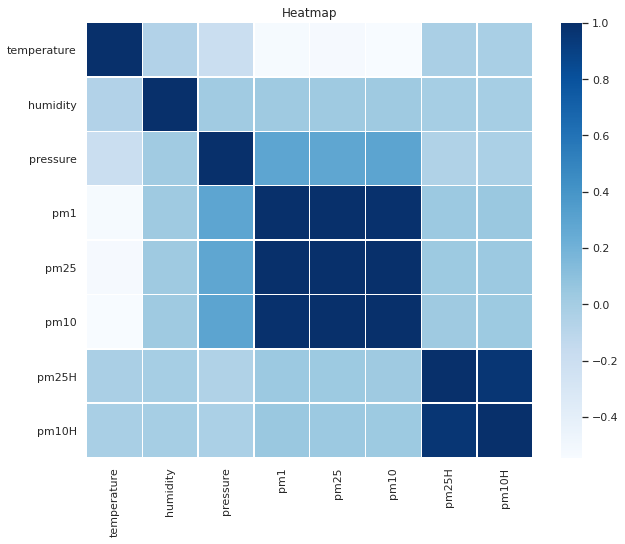

In [291]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Heatmap")
corr = flatM.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [292]:
flatdropna = flatM.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
flatkalibMdropna=flatkalibM.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [293]:
flatdropna['alert'] ='0'
flatkalibMdropna['alert'] ='0'

In [294]:
flatdropna

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name,pm25H,pm10H,pm10mean,pm25mean,alert
0,2017-04-01T00:00:00,6.0,92.0,101906.0,72.0,68.0,104.0,140,115.0,123.0,49.44884338888088,30.919657133734837,0
0,2017-05-01T00:00:00,8.0,104.0,101967.0,48.0,54.0,89.0,140,115.0,123.0,49.44884338888088,30.919657133734837,0
0,2017-06-01T00:00:00,12.0,90.0,101855.0,26.0,22.0,38.0,140,115.0,123.0,49.44884338888088,30.919657133734837,0
0,2017-07-01T00:00:00,14.0,88.0,100825.0,2.0,2.0,3.0,140,115.0,123.0,49.44884338888088,30.919657133734837,0
0,2017-08-01T00:00:00,19.0,92.0,102045.0,28.0,24.0,46.0,140,115.0,123.0,49.44884338888088,30.919657133734837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2017-10-31T23:00:00,4.0,84.0,102344.0,27.0,26.0,50.0,713,153.0,215.0,49.44884338888088,30.919657133734837,0
743,2017-10-31T23:00:00,3.0,84.0,102172.0,26.0,26.0,60.0,857,153.0,215.0,49.44884338888088,30.919657133734837,0
743,2017-05-31T23:00:00,12.0,77.0,101901.0,21.0,18.0,31.0,895,153.0,215.0,49.44884338888088,30.919657133734837,0
743,2017-07-31T23:00:00,19.0,89.0,102048.0,27.0,24.0,45.0,895,153.0,215.0,49.44884338888088,30.919657133734837,0


In [295]:
flatdropna.loc[flatdropna['pm25'] >=12.5, 'alert'] = '1'
flatdropna.loc[flatdropna['pm10'] >=25.15, 'alert'] = '1'
flatdropna.loc[flatdropna['pm25'] >=25, 'alert'] = '2'
flatdropna.loc[flatdropna['pm10'] >=50.3, 'alert'] = '2'

flatkalibMdropna.loc[flatkalibMdropna['pm25'] >=12.5, 'alert'] = '1'
flatkalibMdropna.loc[flatkalibMdropna['pm10'] >=25.15, 'alert'] = '1'
flatkalibMdropna.loc[flatkalibMdropna['pm25'] >=25, 'alert'] = '2'
flatkalibMdropna.loc[flatkalibMdropna['pm10'] >=50.3, 'alert'] = '2'

In [296]:
flat_filtered1 = flatdropna[flatdropna['humidity'] > 0]
flat_filtered = flat_filtered1[flat_filtered1['humidity'] < 100]
flatkalib_filtered1 = flatkalibMdropna[flatkalibMdropna['humidity'] > 0]
flatkalib_filtered = flatkalib_filtered1[flatkalib_filtered1['humidity'] < 100]

In [297]:
flatdropna = flat_filtered
flatkalibMdropna = flatkalib_filtered

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



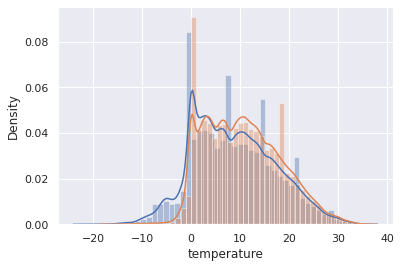

In [298]:
q = flatdropna['temperature'].quantile(0.9999)
data1 = flatdropna[flatdropna['temperature']<q]
data1.describe(include = 'all')
sns.distplot(data1['temperature'])
q = flatkalibMdropna['temperature'].quantile(0.9999)
data1 = flatkalibMdropna[flatkalibMdropna['temperature']<q]
data1.describe(include = 'all')
sns.distplot(data1['temperature'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



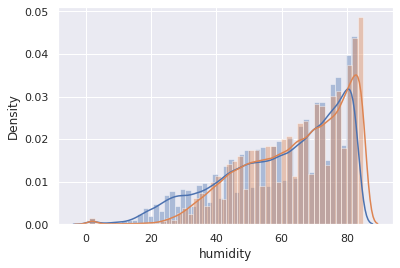

In [299]:
q = flatdropna['humidity'].quantile(0.6)
data1 = flatdropna[flatdropna['humidity']<q]
data1.describe(include = 'all')
sns.distplot(data1['humidity'])
q = flatkalibMdropna['humidity'].quantile(0.6)
data1 = flatkalibMdropna[flatkalibMdropna['humidity']<q]
data1.describe(include = 'all')
sns.distplot(data1['humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



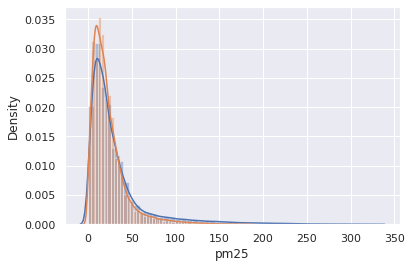

In [300]:
q = flatdropna['pm25'].quantile(0.9999)
data1 = flatdropna[flatdropna['pm25']<q]
data1.describe(include = 'all')
sns.distplot(data1['pm25'])
q = flatkalibMdropna['pm25'].quantile(0.9999)
data1 = flatkalibMdropna[flatkalibMdropna['pm25']<q]
data1.describe(include = 'all')
sns.distplot(data1['pm25'])

In [301]:
flatkalibMdropna

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name,alert
395,2017-03-17T11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,0
396,2017-03-17T12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,1
397,2017-03-17T13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,1
398,2017-03-17T14:00:00,12.0,45.0,100930.0,23.0,17.0,32.0,140,1
399,2017-03-17T15:00:00,12.0,50.0,100873.0,29.0,24.0,45.0,140,1
...,...,...,...,...,...,...,...,...,...
572,2017-12-24T20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895,1
573,2017-12-24T21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895,1
574,2017-12-24T22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895,0
575,2017-12-24T23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



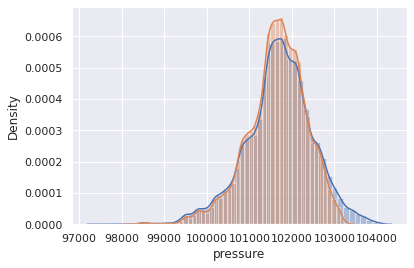

In [302]:
q = flatdropna['pressure'].quantile(0.9999)
data1 = flatdropna[flatdropna['pressure']<q]
data1.describe(include = 'all')
sns.distplot(data1['pressure'])
q = flatkalibMdropna['pressure'].quantile(0.9999)
data1 = flatkalibMdropna[flatkalibMdropna['pressure']<q]
data1.describe(include = 'all')
sns.distplot(data1['pressure'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



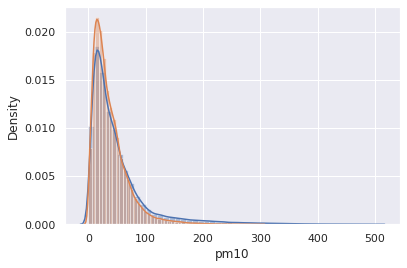

In [303]:
q = flatdropna['pm10'].quantile(0.9999)
data1 = flatdropna[flatdropna['pm10']<q]
data1.describe(include = 'all')
sns.distplot(data1['pm10'])
q = flatkalibMdropna['pm10'].quantile(0.9999)
data1 = flatkalibMdropna[flatkalibMdropna['pm10']<q]
data1.describe(include = 'all')
sns.distplot(data1['pm10'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

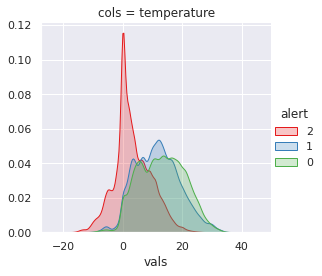

In [304]:
smog = flatdropna[['temperature','alert']]
smog.head()
smog_melt = smog.melt(['alert'], var_name='cols',  value_name='vals')
smog_melt.head()
g = sns.FacetGrid(smog_melt, col='cols', hue="alert", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

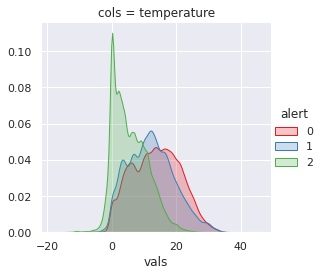

In [305]:
smog = flatkalibMdropna[['temperature','alert']]
smog.head()
smog_melt = smog.melt(['alert'], var_name='cols',  value_name='vals')
smog_melt.head()
g = sns.FacetGrid(smog_melt, col='cols', hue="alert", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

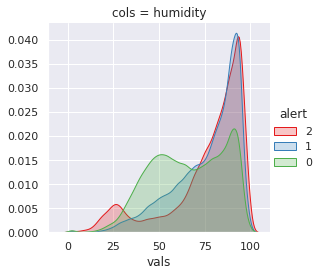

In [306]:
smog = flatdropna[['humidity','alert']]
smog.head()
smog_melt = smog.melt(['alert'], var_name='cols',  value_name='vals')
smog_melt.head()
g = sns.FacetGrid(smog_melt, col='cols', hue="alert", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

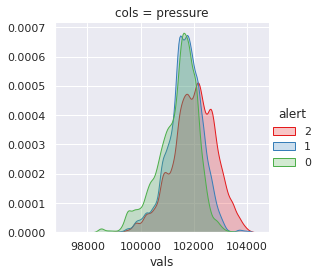

In [307]:
smog = flatdropna[['pressure','alert']]
smog.head()
smog_melt = smog.melt(['alert'], var_name='cols',  value_name='vals')
smog_melt.head()
g = sns.FacetGrid(smog_melt, col='cols', hue="alert", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

In [308]:
flatdropna

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,Name,pm25H,pm10H,pm10mean,pm25mean,alert
0,2017-04-01T00:00:00,6.0,92.0,101906.0,72.0,68.0,104.0,140,115.0,123.0,49.44884338888088,30.919657133734837,2
0,2017-06-01T00:00:00,12.0,90.0,101855.0,26.0,22.0,38.0,140,115.0,123.0,49.44884338888088,30.919657133734837,1
0,2017-07-01T00:00:00,14.0,88.0,100825.0,2.0,2.0,3.0,140,115.0,123.0,49.44884338888088,30.919657133734837,0
0,2017-08-01T00:00:00,19.0,92.0,102045.0,28.0,24.0,46.0,140,115.0,123.0,49.44884338888088,30.919657133734837,1
0,2017-09-01T00:00:00,15.0,90.0,101514.0,34.0,31.0,59.0,140,115.0,123.0,49.44884338888088,30.919657133734837,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2017-10-31T23:00:00,4.0,84.0,102344.0,27.0,26.0,50.0,713,153.0,215.0,49.44884338888088,30.919657133734837,2
743,2017-10-31T23:00:00,3.0,84.0,102172.0,26.0,26.0,60.0,857,153.0,215.0,49.44884338888088,30.919657133734837,2
743,2017-05-31T23:00:00,12.0,77.0,101901.0,21.0,18.0,31.0,895,153.0,215.0,49.44884338888088,30.919657133734837,1
743,2017-07-31T23:00:00,19.0,89.0,102048.0,27.0,24.0,45.0,895,153.0,215.0,49.44884338888088,30.919657133734837,1


dropnięcie danych do których mamy nie mieć dostępu

In [211]:
flat_gotowa = flatdropna.drop(['pm1', 'pm25','pm10'], axis = 1)

# Api pogodowe i Api smogowe podłączenie

In [59]:
import requests
import json
from datetime import datetime

In [60]:
import requests, json
# base URL
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"
# City Name CITY = "Hyderabad"
# API key API_KEY = "Your API Key"
# upadting the URL
URL = BASE_URL + "q=" + "Kraków" + "&appid=" + "73f9237a9d809b085568d75dc4c92e30"
# HTTP request
response = requests.get(URL)
# checking the status code of the request
if response.status_code == 200:
   # getting data in the json format
   data = response.json()
   # getting the main dict block
   main = data['main']
   # getting temperature
   temperature = round(main['temp']-273.15, 1)
   # getting the humidity
   humidity = main['humidity']
   # getting the pressure
   pressure = main['pressure']
   # weather report
   report = data['weather']
  



   print(f"Temperature: {temperature}")
   print(f"Humidity: {humidity}")
   print(f"Pressure: {pressure}")
   print(f"Weather Report: {report[0]['description']}")
else:
   # showing the error message
   print("Error in the HTTP request")
data

Temperature: 3.6
Humidity: 87
Pressure: 1018
Weather Report: broken clouds


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 50.0833, 'lon': 19.9167},
 'dt': 1618590780,
 'id': 3094802,
 'main': {'feels_like': 272.46,
  'humidity': 87,
  'pressure': 1018,
  'temp': 276.78,
  'temp_max': 277.15,
  'temp_min': 276.48},
 'name': 'Krakow',
 'sys': {'country': 'PL',
  'id': 1701,
  'sunrise': 1618544696,
  'sunset': 1618594491,
  'type': 1},
 'timezone': 7200,
 'visibility': 8000,
 'weather': [{'description': 'broken clouds',
   'icon': '04d',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 5.66}}

In [61]:
import requests, json
# base URL
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"
# City Name CITY = "Hyderabad"
# API key API_KEY = "Your API Key"
# upadting the URL
URL = BASE_URL + "q=" + "Kraków" + "&appid=" + "73f9237a9d809b085568d75dc4c92e30"
# HTTP request
response = requests.get(URL)
# checking the status code of the request
if response.status_code == 200:
   # getting data in the json format
   data = response.json()
   # getting the main dict block
   main = data['main']
   # getting temperature
   temperature = round(main['temp']-273.15, 1)
   # getting the humidity
   humidity = main['humidity']
   # getting the pressure
   pressure = main['pressure']
   # weather report
   report = data['weather']
   

   print(f"Temperature: {temperature}")
   print(f"Humidity: {humidity}")
   print(f"Pressure: {pressure}")
   print(f"Weather Report: {report[0]['description']}")
else:
   # showing the error message
   print("Error in the HTTP request")
data

Temperature: 3.6
Humidity: 87
Pressure: 1018
Weather Report: broken clouds


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 50.0833, 'lon': 19.9167},
 'dt': 1618590780,
 'id': 3094802,
 'main': {'feels_like': 272.46,
  'humidity': 87,
  'pressure': 1018,
  'temp': 276.78,
  'temp_max': 277.15,
  'temp_min': 276.48},
 'name': 'Krakow',
 'sys': {'country': 'PL',
  'id': 1701,
  'sunrise': 1618544696,
  'sunset': 1618594491,
  'type': 1},
 'timezone': 7200,
 'visibility': 8000,
 'weather': [{'description': 'broken clouds',
   'icon': '04d',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 5.66}}

In [62]:
x = lambda a : a + 10
print(x(temperature))

13.6


In [63]:
import requests, json
# base URL
BASE_URL = "https://api.openweathermap.org/data/2.5/forecast?"
# City Name CITY = "Hyderabad"
# API key API_KEY = "Your API Key"
# upadting the URL
URL = BASE_URL + "q=" + "Kraków" + "&appid=" + "73f9237a9d809b085568d75dc4c92e30"
# HTTP request
response = requests.get(URL)
# checking the status code of the request
if response.status_code == 200:
   # getting data in the json format
   data2 = response.json()
   # getting the main dict block
  #  main = data['main']
   
   # getting temperature
   #temperature = round(main['temp']-273.15, 1)
   # getting the humidity
   #humidity = main['humidity']
   # getting the pressure
   #pressure = main['pressure']
   # weather report
   #report = data['weather']
  



   #print(f"Temperature: {temperature}")
   #print(f"Humidity: {humidity}")
  # print(f"Pressure: {pressure}")
  # print(f"Weather Report: {report[0]['description']}")
else:
   # showing the error message
   print("Error in the HTTP request")
#pierwszy poziom niżej
list1=data2['list']

In [64]:
#drugi poziom niżej godziny, musi być funkcja to będzie można się dobrać do poszczególnych godzin po wpisaniu.
w=list1[2]
#jeszcze etap niżej co ty już byłaś
main2 = w['main']
#no! i tu etap co zejdziemy do tego co wypisałaś
   # getting temperature
temperature2 = round(main2['temp']-273.15, 1)
   # getting the humidity
humidity2 = main2['humidity']
   # getting the pressure
pressure2 = main2['pressure']

pressure2


1019

# Airly

In [65]:
pip install airly

     |████████████████████████████████| 1.3MB 7.1MB/s 
     |████████████████████████████████| 143kB 30.6MB/s 
     |████████████████████████████████| 296kB 24.7MB/s 


In [66]:
import re
from datetime import datetime
from enum import Enum
import logging
from airly import _private
from airly._private import _EmptyFormat, _DictToObj

In [67]:
pip install pycurl

     |████████████████████████████████| 225kB 9.0MB/s 
  Created wheel for pycurl: filename=pycurl-7.43.0.6-cp37-cp37m-linux_x86_64.whl size=289348 sha256=1a6d45760208a2ba0e8f53d13d29b65dbbc3561f85880573e4d25648937845cb
  Stored in directory: /root/.cache/pip/wheels/d9/a1/7b/2894883fd5c69a3ba684a49d255466d1e924b3cf58cedc1ade
Successfully built pycurl


In [68]:
response = requests.get('https://airapi.airly.eu/v2/measurements/point?lat=200&lng=19.940984', data = {'key':'HC4lj4KL2cnNmKpLgANyYFdmTaa2GVAB'})

In [69]:
response

<Response [401]>

In [70]:
API_KEY = 'HC4lj4KL2cnNmKpLgANyYFdmTaa2GVAB'

In [71]:
!wget https://raw.githubusercontent.com/jodekpotasu/smoghub/master/sample.api_key -P "/content/drive/My Drive/app"




--2021-04-16 16:34:05--  https://raw.githubusercontent.com/jodekpotasu/smoghub/master/sample.api_key
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32 [text/plain]
Saving to: ‘/content/drive/My Drive/app/sample.api_key’

sample.api_key      100%[===================>]      32  --.-KB/s    in 0s      

2021-04-16 16:34:05 (1.66 MB/s) - ‘/content/drive/My Drive/app/sample.api_key’ saved [32/32]



In [72]:
api = pd.read_csv('/content/drive/My Drive/app/sample.api_key', header = None)

In [73]:
import logging
import sys
from collections import OrderedDict
import asyncio
from pathlib import Path

import aiohttp

from airly import Airly
from airly.measurements import Measurement

In [74]:
API_KEY = Path('/content/drive/My Drive/app/sample.api_key').read_text()

In [75]:
API_KEY

'HC4lj4KL2cnNmKpLgANyYFdmTaa2GVAB'

In [76]:
INSTALLATION_ID = 204
LATITUDE = 50.06298
LONGITUDE = 19.93534

In [77]:
async def main():
    pyairly_logger = logging.getLogger('pyairly')
    pyairly_logger.setLevel(logging.DEBUG)
    pyairly_logger.addHandler(logging.StreamHandler(sys.stdout))
    async with aiohttp.ClientSession() as http_session:
        airly = Airly(API_KEY, http_session)
        measurements_clients = OrderedDict([
            ('for specific installation',
                airly.create_measurements_session_installation(2764)),
            ('for nearest installation',
                airly.create_measurements_session_nearest(
                    LATITUDE, LONGITUDE)),
            ('interpolated for specific point',
                airly.create_measurements_session_point(
                    LATITUDE, LONGITUDE))
        ])

        for description, client in measurements_clients.items():
            print()
            sys.stdout.flush()
            await client.update()
            sys.stdout.flush()
            current = client.current
            print("Measurements %s:" % description)
            for m in Measurement.MEASUREMENTS_TYPES:
                print("%s: %s" % (m, current.values.get(m)))



In [78]:
loop = asyncio.get_event_loop()


In [79]:
loop.run_until_complete(main())
loop.close()

RuntimeError: ignored

In [ ]:
pip install --upgrade jsonpath-ng

In [ ]:
from jsonpath_ng import jsonpath, parse

In [ ]:
pip install python-openhab

In [ ]:
from openhab import OpenHAB

In [ ]:
from http.server import BaseHTTPRequestHandler, HTTPServer
import logging

In [ ]:

import logging
import sys
from collections import OrderedDict
import asyncio
from pathlib import Path

import aiohttp

from airly import Airly
from airly.measurements import Measurement

# Before running the sample,
#   you need to create .api_key file filled with your API key.
# After you are logged in, you can copy it from here:
#   https://developer.airly.eu/api
try:
    API_KEY = Path('/content/drive/My Drive/app/sample.api_key').read_text()
except FileNotFoundError:
    print('Save your API key in samples/.api_key file', file=sys.stderr)
    exit(1)

INSTALLATION_ID = 204
LATITUDE = 50.06298
LONGITUDE = 19.93534
MAX_DIST_KM = 0.5


async def main():
    pyairly_logger = logging.getLogger('pyairly')
    pyairly_logger.setLevel(logging.DEBUG)
    pyairly_logger.addHandler(logging.StreamHandler(sys.stdout))
    async with aiohttp.ClientSession() as http_session:
        airly = Airly(API_KEY, http_session)

        print('Installation %d:' % INSTALLATION_ID)
        sys.stdout.flush()
        installation = await airly.load_installation_by_id(INSTALLATION_ID)
        sys.stdout.flush()
        print("{}, {}.\n{}: {}".format(installation.address.displayAddress1,
                                       installation.address.displayAddress2,
                                       installation.sponsor.description,
                                       installation.sponsor.name))

        print('\nInstallations {:.2f} km apart from latitude {:f} and '
              'longitude {:f}:\n'
              .format(MAX_DIST_KM, LATITUDE, LONGITUDE))
        sys.stdout.flush()
        installations_list = await airly.load_installation_nearest(
            LATITUDE, LONGITUDE, max_distance_km=MAX_DIST_KM, max_results=-1)
        sys.stdout.flush()
        for i in installations_list:
            print("{}, {}.\n{}: {}\n".format(
                i.address.displayAddress1, i.address.displayAddress2,
                i.sponsor.description, i.sponsor.name))

loop = asyncio.get_event_loop()
loop.run_until_complete(main())
# loop.close()


In [ ]:
import logging
import sys
from collections import OrderedDict
import asyncio
from pathlib import Path

import aiohttp

from airly import Airly
from airly.measurements import Measurement

# Before running the sample,
#   you need to create .api_key file filled with your API key.
# After you are logged in, you can copy it from here:
#   https://developer.airly.eu/api
try:
    API_KEY = Path('/content/drive/My Drive/app/sample.api_key').read_text()
except FileNotFoundError:
    print('Save your API key in samples/.api_key file', file=sys.stderr)
    exit(1)

INSTALLATION_ID = 204
LATITUDE = 50.06298
LONGITUDE = 19.93534


async def main():
    pyairly_logger = logging.getLogger('pyairly')
    pyairly_logger.setLevel(logging.DEBUG)
    pyairly_logger.addHandler(logging.StreamHandler(sys.stdout))
    async with aiohttp.ClientSession() as http_session:
        airly = Airly(API_KEY, http_session)
        measurements_clients = OrderedDict([
            ('for specific installation',
                airly.create_measurements_session_installation(2764)),
            ('for nearest installation',
                airly.create_measurements_session_nearest(
                    LATITUDE, LONGITUDE)),
            ('interpolated for specific point',
                airly.create_measurements_session_point(
                    LATITUDE, LONGITUDE))
        ])

        for description, client in measurements_clients.items():
            print()
            sys.stdout.flush()
            await client.update()
            sys.stdout.flush()
            current = client.current
            print("Measurements %s:" % description)
            for m in Measurement.MEASUREMENTS_TYPES:
                print("%s: %s" % (m, current.values.get(m)))

loop = asyncio.get_event_loop()
loop.run_until_complete(main())
loop.close()

# Porządkowanie danych do modelu

Biorąc pod uwagę możliwości pobierania danych, zakładamy iż w modelu powinny się znaleźć: ciśnienie, wilgotność, temperatura, średnia PM10 z 24h do tyłu, średnia godzinowa z tej samej godziny dzień wcześniej
dodajemy kolejne 4 zmienne, które powinny mocno wspomóc model

In [309]:
flat_gotowa

,UTC time,temperature,humidity,pressure,Name,pm25H,pm10H,pm10mean,pm25mean,alert
0,2017-04-01T00:00:00,6.0,92.0,101906.0,140,115.0,123.0,49.44884338888088,30.919657133734837,2
0,2017-06-01T00:00:00,12.0,90.0,101855.0,140,115.0,123.0,49.44884338888088,30.919657133734837,1
0,2017-07-01T00:00:00,14.0,88.0,100825.0,140,115.0,123.0,49.44884338888088,30.919657133734837,0
0,2017-08-01T00:00:00,19.0,92.0,102045.0,140,115.0,123.0,49.44884338888088,30.919657133734837,1
0,2017-09-01T00:00:00,15.0,90.0,101514.0,140,115.0,123.0,49.44884338888088,30.919657133734837,2
...,...,...,...,...,...,...,...,...,...,...
743,2017-10-31T23:00:00,4.0,84.0,102344.0,713,153.0,215.0,49.44884338888088,30.919657133734837,2
743,2017-10-31T23:00:00,3.0,84.0,102172.0,857,153.0,215.0,49.44884338888088,30.919657133734837,2
743,2017-05-31T23:00:00,12.0,77.0,101901.0,895,153.0,215.0,49.44884338888088,30.919657133734837,1
743,2017-07-31T23:00:00,19.0,89.0,102048.0,895,153.0,215.0,49.44884338888088,30.919657133734837,1


In [310]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup
import requests
import re
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import xlwt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [311]:
y = flat_gotowa.iloc[:,-1]
y

0      2
0      1
0      0
0      1
0      2
      ..
743    2
743    2
743    1
743    1
743    2
Name: alert, Length: 276292, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



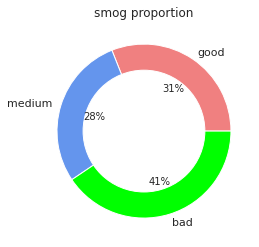

In [312]:
good = len(flat_gotowa[flat_gotowa['alert'] == '0'])
medium = len(flat_gotowa[flat_gotowa['alert'] == '1'])
bad = len(flat_gotowa[flat_gotowa['alert'] == '2'])
# create data
names='good', 'medium','bad'
size=[good, medium,bad]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue','lime'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("smog proportion")
plt.show()

In [313]:
scaler = StandardScaler()

In [314]:
x_bezskalowania = flat_gotowa.drop(['UTC time','alert'], axis = 1)

In [315]:
scaler.fit(x_bezskalowania)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [316]:
x = scaler.transform(x_bezskalowania)

picklowanie scalera

In [317]:
# could use: import pickle... however let's do something else
from sklearn.externals import joblib 

# this is more efficient than pickle for things like large numpy arrays
# ... which sklearn models often have.   

# then just 'dump' your file
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

In [332]:
y2 = pd.DataFrame(y)
x2 = pd.DataFrame(x)

In [334]:
type(x2)

pandas.core.frame.DataFrame

In [335]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train, test in cv.split(x2, y2):
  X_train_kfold, y_train_kfold = x2.iloc[train], y2.iloc[train]
  X_test_kfold, y_test_kfold = x2.iloc[test], y2.iloc[test]

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train_kfold, y_train_kfold)
    y_pred_kfold = model.predict(X_test_kfold)
    print(model.__class__.__name__)
    print(classification_report(y_test_kfold, y_pred_kfold))
    cm = confusion_matrix(y_test_kfold, y_pred_kfold)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict on the test features, print the results
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy
def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_test, pred), 'kNN')

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [ ]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_knn = {
    'n_neighbors': [2, 3, 5, 7, 10, 15],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
clf  = GridSearchCV(KNeighborsClassifier(), params_knn)
clf.fit(X_train_kfold, y_train_kfold)
clf.best_params_

In [ ]:
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'chebyshev', n_neighbors= 10)

In [ ]:
knn.fit(X_train_kfold, y_train_kfold)
y_pred_kfold = knn.predict(X_test_kfold)

In [ ]:
print_results(calculate_metrics(y_test_kfold, y_pred_kfold), 'kNN for KFold')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

params_grid = {
    'C': [0.01, 0.1, 1, 10, 100,],
    'kernel': ["linear", "rbf"],
    'class_weight': [None, "balanced"]
}

clf = GridSearchCV(SVC(), params_grid, scoring="recall")
clf.fit(X_train, y_train)

In [ ]:
model = SVC(C=1, class_weight=None, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
vm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(vm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

In [ ]:
model = SVC(C=10, gamma= 0.001, class_weight=None, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
gnb = GaussianNB()  # inny klasyfikator
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print(y_test.values)
print(y_gnb)
print(confusion_matrix(y_test,y_gnb))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_test.values, y_gnb), 'GNB')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.bestscore)
print(gs.bestparams)
print(gs.cvresults)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)